# Import Libraries

In [1]:
import pandas as pd
import pytz
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import dataframe_image as dfi
from datetime import datetime
from pytz import timezone
import numpy as np
from sklearn.linear_model import LinearRegression

# Load in Data

In [2]:
# Load the data by pasting file path into each read_excel function
broadcast_df = pd.read_excel("/Users/vancearmstrong/Library/CloudStorage/OneDrive-CalPoly/Grad School/NY Jets/NYJ-GSB503-2022-04/Broadcast_Exposures.xlsx")
social_df = pd.read_excel("/Users/vancearmstrong/Library/CloudStorage/OneDrive-CalPoly/Grad School/NY Jets/NYJ-GSB503-2022-04/Social_Media_Engagements.xlsx")
videoboard_df = pd.read_excel("/Users/vancearmstrong/Library/CloudStorage/OneDrive-CalPoly/Grad School/NY Jets/NYJ-GSB503-2022-04/Videoboard_Features.xlsx")
content_series = pd.read_excel("/Users/vancearmstrong/Library/CloudStorage/OneDrive-CalPoly/Grad School/NY Jets/NYJ-GSB503-2022-04/Social_Media_Tag_Lookup_Table.xlsx")

In [3]:
# Adjust Time Zone from UTC to EST (Accounts for Daylight Savings)
social_df['PartnerExposureDatetime'] = social_df['PartnerExposureDatetime'].dt.tz_localize(tz='UTC').dt.tz_convert('US/Eastern')

In [4]:
# Creating a new dataframe that is just for Instagram Story Analysis
# This dataframe only contains columns relevant to Instagram Stories
instagram_story = social_df[social_df['ServiceType']=='Instagram Story']
instagram_story = instagram_story.dropna(axis = 1, how='all')

# Data Pre-Processing

In [5]:
# Remove posts with abnormally high engagment rates (Outliers)
social_df = social_df[social_df['EngagementRate'] < .9]
social_df['ServiceType'].unique()

array(['Instagram', 'Twitter', 'YouTube', 'Facebook'], dtype=object)

# Instagram Story Analysis

## Data Prep

In [6]:
# Create new column called tap ratio which is the ratio of tap backwards to tap forwards on an instagram story
instagram_story['tap_ratio'] = instagram_story['TapBackwardCount']/instagram_story['TapForwardCount']
instagram_story = instagram_story.sort_values(by = 'tap_ratio', ascending=False)
instagram_story.head()

,ServiceType,ServiceId,PartnerExposureCreatorName,PartnerExposureDatetime,SeasonYear,PartnerExposureDate,Message,ContentType,Url,FollowerCount,...,Engagement,Sentiment,Tags,TextMention,ExitsCount,TapForwardCount,TapBackwardCount,Reach,PostValue,tap_ratio
406,Instagram Story,17891553005189800.0,New York Jets,2021-06-15 12:28:59-04:00,2021,2021-06-15,@tylerkroft will take that 😳,Video,https://media.zoomph.com/instagram/17841400568...,802935.0,...,0,Objective,Jets Owned,Jets Owned,2384.0,26185.0,6999.0,37178.0,299.0,0.267290
2254,Instagram Story,18250512481073600.0,New York Jets,2022-01-12 17:43:28-05:00,2021,2022-01-12,NaN,Photo,https://media.zoomph.com/instagram/17841400568...,823644.0,...,0,Objective,"JetBlue ALL,JetBlue Sponsored,Jets Owned,Wallp...",Jets Owned,1330.0,25279.0,5289.0,25781.0,204.0,0.209225
195,Instagram Story,17876637356425700.0,New York Jets,2021-06-15 12:37:39-04:00,2021,2021-06-15,WORK WORK WORK WORK WORK WORK WORK WORK WORK W...,Video,https://media.zoomph.com/instagram/17841400568...,802935.0,...,0,Objective,Jets Owned,Jets Owned,1623.0,24416.0,4744.0,35857.0,288.0,0.194299
876,Instagram Story,17914039517227900.0,New York Jets,2021-12-30 08:49:02-05:00,2021,2021-12-30,NaN,Photo,https://media.zoomph.com/instagram/17841400568...,817754.0,...,0,Objective,"Jets Owned,VISA,VISA ALL,Visa Did You Know,VIS...",Jets Owned,644.0,25187.0,4892.0,22388.0,180.0,0.194227
1922,Instagram Story,18091716970275800.0,New York Jets,2021-09-06 11:42:35-04:00,2021,2021-09-06,WEEK ONE LET’S GET AFTER IT. @braxtonberrios,Video,https://media.zoomph.com/instagram/17841400568...,802935.0,...,0,Objective,"Jets Owned,Nike ALL",Jets Owned,1595.0,25509.0,4898.0,38558.0,309.0,0.192011


In [7]:
tag_separated = instagram_story['Tags'].str.split(',', expand=True)
tag_separated = tag_separated.iloc[:,-12:].add_prefix('Tag')
story_tags = instagram_story.join(tag_separated)
story_tags['ID'] = story_tags.index
story_tags = story_tags.rename(columns = {'Tags':'OriginalT_ags'})
story_tags.head()

,ServiceType,ServiceId,PartnerExposureCreatorName,PartnerExposureDatetime,SeasonYear,PartnerExposureDate,Message,ContentType,Url,FollowerCount,...,Tag3,Tag4,Tag5,Tag6,Tag7,Tag8,Tag9,Tag10,Tag11,ID
406,Instagram Story,17891553005189800.0,New York Jets,2021-06-15 12:28:59-04:00,2021,2021-06-15,@tylerkroft will take that 😳,Video,https://media.zoomph.com/instagram/17841400568...,802935.0,...,None,None,None,None,None,None,None,None,None,406
2254,Instagram Story,18250512481073600.0,New York Jets,2022-01-12 17:43:28-05:00,2021,2022-01-12,NaN,Photo,https://media.zoomph.com/instagram/17841400568...,823644.0,...,Wallpaper Wednesday,None,None,None,None,None,None,None,None,2254
195,Instagram Story,17876637356425700.0,New York Jets,2021-06-15 12:37:39-04:00,2021,2021-06-15,WORK WORK WORK WORK WORK WORK WORK WORK WORK W...,Video,https://media.zoomph.com/instagram/17841400568...,802935.0,...,None,None,None,None,None,None,None,None,None,195
876,Instagram Story,17914039517227900.0,New York Jets,2021-12-30 08:49:02-05:00,2021,2021-12-30,NaN,Photo,https://media.zoomph.com/instagram/17841400568...,817754.0,...,Visa Did You Know,VISA Sponsored,None,None,None,None,None,None,None,876
1922,Instagram Story,18091716970275800.0,New York Jets,2021-09-06 11:42:35-04:00,2021,2021-09-06,WEEK ONE LET’S GET AFTER IT. @braxtonberrios,Video,https://media.zoomph.com/instagram/17841400568...,802935.0,...,None,None,None,None,None,None,None,None,None,1922


In [8]:
story_tags_long = pd.wide_to_long(story_tags, stubnames='Tag', i='ID', j='ContentSeries')
clean_stories = story_tags_long.dropna(subset=['Tag'])
clean_stories = clean_stories.sort_values(by=['ID'])
clean_stories = clean_stories.droplevel(1)
clean_stories

,Message,Sentiment,Url,FollowerCount,Engagement,OriginalT_ags,PostValue,Reach,tap_ratio,Hashtags,...,ServiceId,TapBackwardCount,SeasonYear,ReplyCount,PartnerExposureDatetime,ExitsCount,CommentCount,TapForwardCount,LikeCount,Tag
ID,,,,,,,,,,,,,,,,,,,,,
0,CELLY TIME @kenny_yeboah84,Objective,https://media.zoomph.com/instagram/17841400568...,802935.0,0,"Jets Owned,Nike ALL",209.0,26077.0,0.062323,NaN,...,17842512650649100.0,1676.0,2021,5.0,2021-08-27 22:41:17-04:00,856.0,0.0,26892.0,0,Jets Owned
0,CELLY TIME @kenny_yeboah84,Objective,https://media.zoomph.com/instagram/17841400568...,802935.0,0,"Jets Owned,Nike ALL",209.0,26077.0,0.062323,NaN,...,17842512650649100.0,1676.0,2021,5.0,2021-08-27 22:41:17-04:00,856.0,0.0,26892.0,0,Nike ALL
1,@mosley32rtr,Objective,https://media.zoomph.com/instagram/17841400568...,809630.0,0,"Jets Owned,VISA,VISA ALL,Visa Gameday Cam,VISA...",274.0,34577.0,0.050388,NaN,...,17843378528682900.0,1591.0,2021,16.0,2021-11-04 17:40:33-04:00,1080.0,0.0,31575.0,0,Visa Gameday Cam
1,@mosley32rtr,Objective,https://media.zoomph.com/instagram/17841400568...,809630.0,0,"Jets Owned,VISA,VISA ALL,Visa Gameday Cam,VISA...",274.0,34577.0,0.050388,NaN,...,17843378528682900.0,1591.0,2021,16.0,2021-11-04 17:40:33-04:00,1080.0,0.0,31575.0,0,VISA Sponsored
1,@mosley32rtr,Objective,https://media.zoomph.com/instagram/17841400568...,809630.0,0,"Jets Owned,VISA,VISA ALL,Visa Gameday Cam,VISA...",274.0,34577.0,0.050388,NaN,...,17843378528682900.0,1591.0,2021,16.0,2021-11-04 17:40:33-04:00,1080.0,0.0,31575.0,0,Jets Owned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,@bmarshall,Objective,https://media.zoomph.com/instagram/17841400568...,830414.0,0,"Jets Owned,Uber ALL,uber eats birthday",169.0,21030.0,0.016962,NaN,...,18293421199044500.0,301.0,2021,9.0,2022-03-23 09:21:55-04:00,3178.0,0.0,17746.0,0,Jets Owned
2334,@bmarshall,Objective,https://media.zoomph.com/instagram/17841400568...,830414.0,0,"Jets Owned,Uber ALL,uber eats birthday",169.0,21030.0,0.016962,NaN,...,18293421199044500.0,301.0,2021,9.0,2022-03-23 09:21:55-04:00,3178.0,0.0,17746.0,0,Uber ALL
2334,@bmarshall,Objective,https://media.zoomph.com/instagram/17841400568...,830414.0,0,"Jets Owned,Uber ALL,uber eats birthday",169.0,21030.0,0.016962,NaN,...,18293421199044500.0,301.0,2021,9.0,2022-03-23 09:21:55-04:00,3178.0,0.0,17746.0,0,uber eats birthday


In [9]:
# Matching the Tag with the default/generic Content Series name
master_stories = clean_stories.merge(content_series, on = 'Tag', how = 'left')
master_stories = master_stories.sort_values(by='tap_ratio', ascending=False)
master_stories
#master.to_csv('master_content.csv')

,Message,Sentiment,Url,FollowerCount,Engagement,OriginalT_ags,PostValue,Reach,tap_ratio,Hashtags,...,TapBackwardCount,SeasonYear,ReplyCount,PartnerExposureDatetime,ExitsCount,CommentCount,TapForwardCount,LikeCount,Tag,Content_Series_Name
681,@tylerkroft will take that 😳,Objective,https://media.zoomph.com/instagram/17841400568...,802935.0,0,Jets Owned,299.0,37178.0,0.267290,NaN,...,6999.0,2021,14.0,2021-06-15 12:28:59-04:00,2384.0,0.0,26185.0,0,Jets Owned,NaN
4162,NaN,Objective,https://media.zoomph.com/instagram/17841400568...,823644.0,0,"JetBlue ALL,JetBlue Sponsored,Jets Owned,Wallp...",204.0,25781.0,0.209225,NaN,...,5289.0,2021,3.0,2022-01-12 17:43:28-05:00,1330.0,0.0,25279.0,0,Jets Owned,NaN
4163,NaN,Objective,https://media.zoomph.com/instagram/17841400568...,823644.0,0,"JetBlue ALL,JetBlue Sponsored,Jets Owned,Wallp...",204.0,25781.0,0.209225,NaN,...,5289.0,2021,3.0,2022-01-12 17:43:28-05:00,1330.0,0.0,25279.0,0,JetBlue Sponsored,NaN
4165,NaN,Objective,https://media.zoomph.com/instagram/17841400568...,823644.0,0,"JetBlue ALL,JetBlue Sponsored,Jets Owned,Wallp...",204.0,25781.0,0.209225,NaN,...,5289.0,2021,3.0,2022-01-12 17:43:28-05:00,1330.0,0.0,25279.0,0,Wallpaper Wednesday,NaN
4164,NaN,Objective,https://media.zoomph.com/instagram/17841400568...,823644.0,0,"JetBlue ALL,JetBlue Sponsored,Jets Owned,Wallp...",204.0,25781.0,0.209225,NaN,...,5289.0,2021,3.0,2022-01-12 17:43:28-05:00,1330.0,0.0,25279.0,0,JetBlue ALL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,You don’t want to miss this one.,Objective,https://media.zoomph.com/instagram/17841400568...,813780.0,0,"JetBlue,JetBlue ALL,JetBlue One Jets Drive,Jet...",0.0,NaN,NaN,NaN,...,NaN,2021,NaN,2021-12-03 12:41:32-05:00,NaN,0.0,NaN,0,JetBlue One Jets Drive,One Jets Drive
4274,You don’t want to miss this one.,Objective,https://media.zoomph.com/instagram/17841400568...,813780.0,0,"JetBlue,JetBlue ALL,JetBlue One Jets Drive,Jet...",0.0,NaN,NaN,NaN,...,NaN,2021,NaN,2021-12-03 12:41:32-05:00,NaN,0.0,NaN,0,JetBlue ALL,NaN
4275,You don’t want to miss this one.,Objective,https://media.zoomph.com/instagram/17841400568...,813780.0,0,"JetBlue,JetBlue ALL,JetBlue One Jets Drive,Jet...",0.0,NaN,NaN,NaN,...,NaN,2021,NaN,2021-12-03 12:41:32-05:00,NaN,0.0,NaN,0,Jets Owned,NaN
4276,You don’t want to miss this one.,Objective,https://media.zoomph.com/instagram/17841400568...,813780.0,0,"JetBlue,JetBlue ALL,JetBlue One Jets Drive,Jet...",0.0,NaN,NaN,NaN,...,NaN,2021,NaN,2021-12-03 12:41:32-05:00,NaN,0.0,NaN,0,JetBlue Sponsored,NaN


In [10]:
insta_stories_content_series_only = master_stories[master_stories['Content_Series_Name'].notna()]
insta_story_cs_only = insta_stories_content_series_only[['Content_Series_Name', 'tap_ratio', 'ExitsCount']]
insta_story_cs_only = insta_story_cs_only.groupby('Content_Series_Name')['tap_ratio'].describe().reset_index()
insta_story_cs_only = insta_story_cs_only.sort_values(by='mean', ascending=False)
insta_story_cs_only

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
8,Did You Know,10.0,0.118955,0.051885,0.053615,0.081547,0.092704,0.170654,0.194227
13,Gameday Poster,2.0,0.115168,0.053914,0.077045,0.096106,0.115168,0.134229,0.153291
19,My Cause My Cleats,33.0,0.109853,0.046400,0.023434,0.081680,0.106298,0.132559,0.185482
28,Pro Bowl,1.0,0.106257,NaN,0.106257,0.106257,0.106257,0.106257,0.106257
21,Next Gen Stats,1.0,0.106257,NaN,0.106257,0.106257,0.106257,0.106257,0.106257
27,Press Backdrop,1.0,0.083158,NaN,0.083158,0.083158,0.083158,0.083158,0.083158
9,Game Preview,6.0,0.074143,0.050990,0.029397,0.039537,0.057895,0.090416,0.164997
12,Gameday Guide,14.0,0.069711,0.055881,0.018000,0.022868,0.050713,0.111954,0.186587
4,Celebrities,20.0,0.067196,0.035384,0.017846,0.045057,0.057045,0.090953,0.143189
14,Highlights,2.0,0.064036,0.004494,0.060858,0.062447,0.064036,0.065625,0.067214


## Tap Ratio Analysis

### Threshold of top 75% of instagram content series in terms of post count

In [11]:
# Instagram Stories - Lowest tap ratio for post count in top 75%
first_quantile = insta_story_cs_only['count'].quantile(0.25)
third_quantile = insta_story_cs_only['count'].quantile(0.75)
is_tap_top75 = insta_story_cs_only[insta_story_cs_only['count']>first_quantile]
is_low_tap_75 = is_tap_top75.nsmallest(10, 'mean')

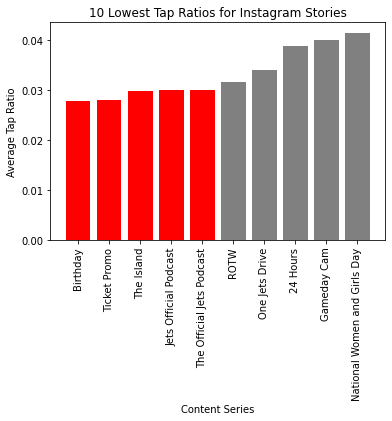

In [12]:
# Plotting the 10 lowest performing instagram story content series in terms of tap ratio
plt.bar('Content_Series_Name', 'mean', data=is_low_tap_75, color=['red', 'red', 'red', 'red', 'red', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('10 Lowest Tap Ratios for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Tap Ratio')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

In [13]:
# Instagram Stories - Highest tap ratio for post count in top 75%
is_high_tap_75 = is_tap_top75.nlargest(10, 'mean')

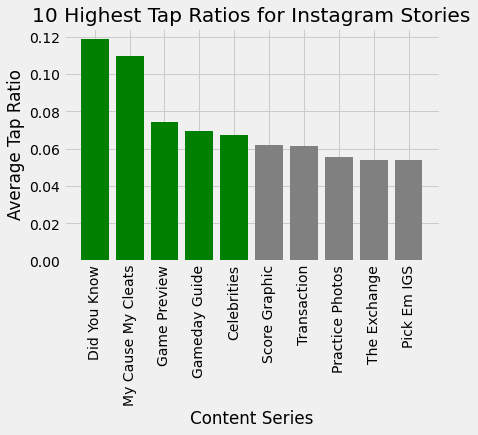

In [14]:
# Plotting the 10 highest performing instagram story content series in terms of tap ratio
plt.bar('Content_Series_Name', 'mean', data=is_high_tap_75, color=['green', 'green', 'green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('10 Highest Tap Ratios for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Tap Ratio')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

### No threshold in terms of Post Count

In [15]:
# Instagram stories - Lowest tap ratio for all content series posts
is_low_tap_noth = insta_story_cs_only.nsmallest(10, 'mean')

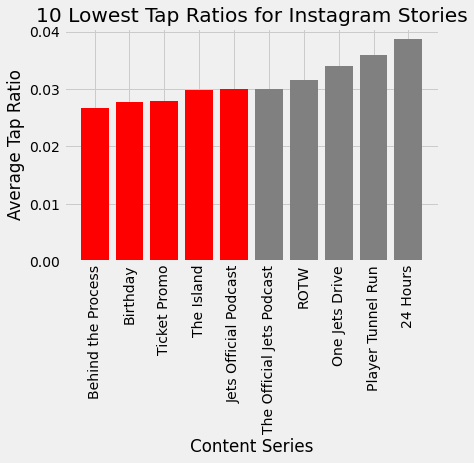

In [16]:
# Plotting the 10 lowest performing instagram story content series in terms of tap ratio
plt.bar('Content_Series_Name', 'mean', data=is_low_tap_noth, color=['red', 'red', 'red', 'red', 'red', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('10 Lowest Tap Ratios for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Tap Ratio')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

In [17]:
# Instagram Stories - Highest Tap ratio for all content series posts
is_high_tap_noth = insta_story_cs_only.nlargest(10, 'mean')

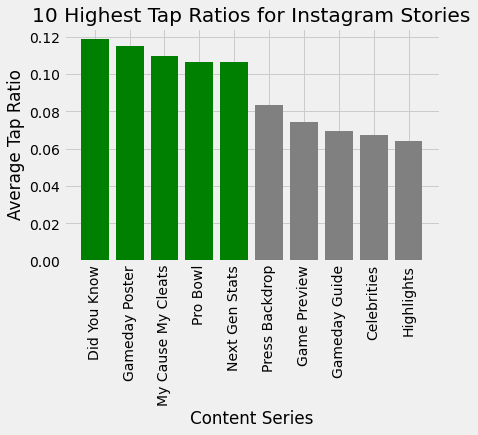

In [18]:
# Plotting the 10 lowest performing instagram story content series in terms of tap ratio
plt.bar('Content_Series_Name', 'mean', data=is_high_tap_noth, color=['green', 'green', 'green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('10 Highest Tap Ratios for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Tap Ratio')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

## Exit Count Analysis

In [19]:
# Get Datafram prepared to perform analysis on Exit Counts
insta_story_cs_only = insta_stories_content_series_only[['Content_Series_Name', 'tap_ratio', 'ExitsCount']]
insta_story_cs_only = insta_story_cs_only.groupby('Content_Series_Name')['ExitsCount'].describe().reset_index()
insta_story_cs_only = insta_story_cs_only.sort_values(by='mean', ascending=False)

first_quantile = insta_story_cs_only['count'].quantile(0.25)

### Threshold of top 75% of instagram content series in terms of post count

In [20]:
# Instagram Stories - Lowest Exit Count for post count in top 75%
low_exit_75 = insta_story_cs_only[insta_story_cs_only['count']>first_quantile]
low_exit_75 = low_exit_75.nsmallest(10, 'mean')

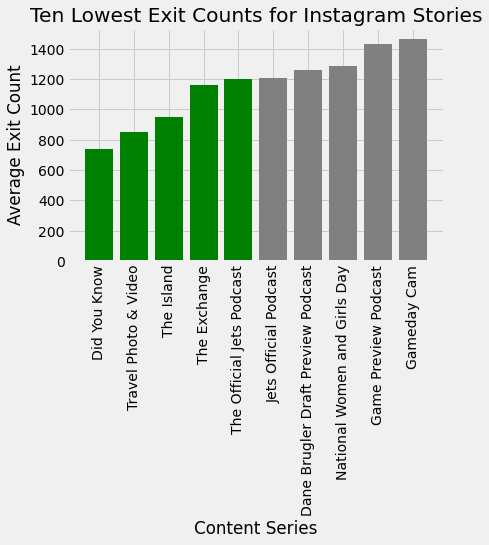

In [21]:
# Plotting the 10 highest performing instagram story content series in terms of exit count
plt.bar('Content_Series_Name', 'mean', data=low_exit_75, color=['green', 'green', 'green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Ten Lowest Exit Counts for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Exit Count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

In [22]:
# Instagram Stories - Highest Exit Count for post count in top 75%
high_exit_75 = insta_story_cs_only[insta_story_cs_only['count']>first_quantile]
high_exit_75 = high_exit_75.nlargest(10, 'mean')

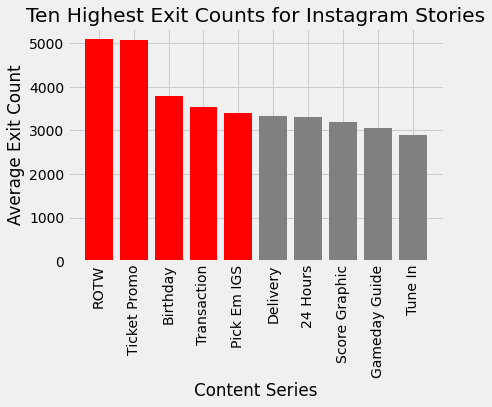

In [23]:
# Plotting the 10 lowest performing instagram story content series in terms of exit count
plt.bar('Content_Series_Name', 'mean', data=high_exit_75, color=['red', 'red', 'red', 'red', 'red', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Ten Highest Exit Counts for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Exit Count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

### No threshold in terms of Post Count

In [24]:
# Instagram stories - Lowest Exit Count for all content series posts
low_exit_noth = insta_story_cs_only.nsmallest(10, 'mean')

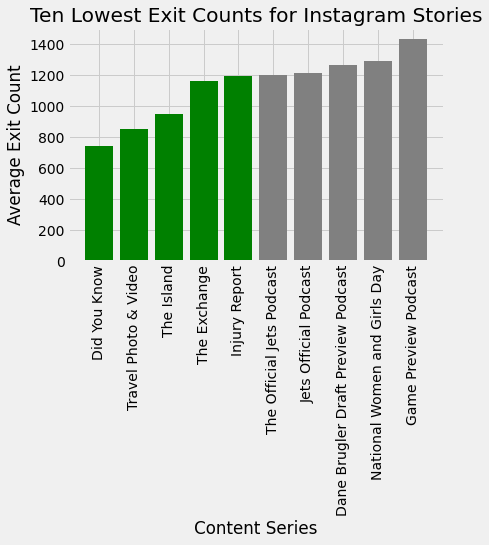

In [25]:
# Plotting the 10 highest performing instagram story content series in terms of exit count
plt.bar('Content_Series_Name', 'mean', data=low_exit_noth, color=['green', 'green', 'green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Ten Lowest Exit Counts for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Exit Count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

In [26]:
# Instagram Stories - Highest Exit Count for all content series posts
high_exit_noth = insta_story_cs_only.nlargest(10, 'mean')

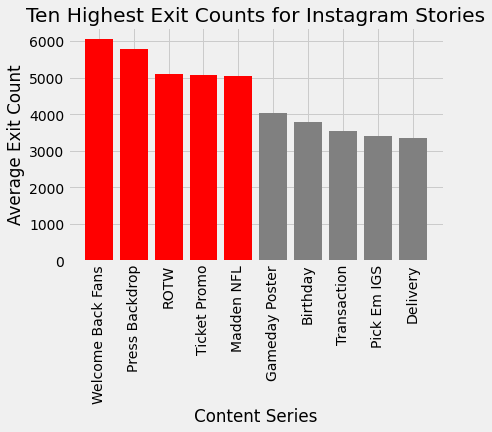

In [27]:
# Plotting the 10 lowest performing instagram story content series in terms of exit count
plt.bar('Content_Series_Name', 'mean', data=high_exit_noth, color=['red', 'red', 'red', 'red', 'red', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Ten Highest Exit Counts for Instagram Stories')
plt.xlabel('Content Series')
plt.ylabel('Average Exit Count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

# Engagement Rate by Content Type Analysis (Photo, Video, Text)

In [28]:
# Create separate dataframes for social media types
fb = social_df[social_df['ServiceType']=='Facebook']
insta = social_df[social_df['ServiceType']=='Instagram']
tw = social_df[social_df['ServiceType']=='Twitter']
yt = social_df[social_df['ServiceType']=='YouTube']

Text(0.5, 1.0, 'Facebook: Engagement Rate by Content Type')

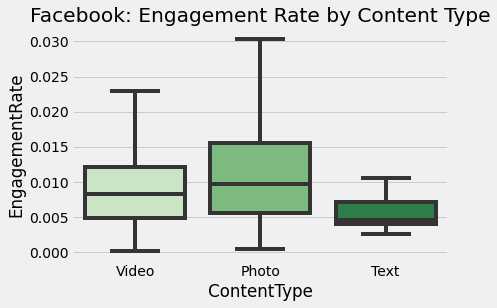

In [29]:
# Boxplot visualizing EngagementRate by Content Type for Facebook
sns.boxplot(x = fb['ContentType'], y = fb['EngagementRate'], showfliers = False, palette='Greens')
plt.title('Facebook: Engagement Rate by Content Type')

Text(0.5, 1.0, 'Instagram: Engagement Rate by Content Type')

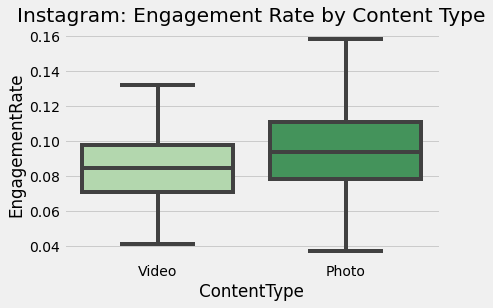

In [30]:
# Boxplot visualizing EngagementRate by Content Type for Instagram
sns.boxplot(x = insta['ContentType'], y = insta['EngagementRate'], showfliers = False, palette='Greens')
plt.title('Instagram: Engagement Rate by Content Type')

Text(0.5, 1.0, 'Twitter: Engagement Rate by Content Type')

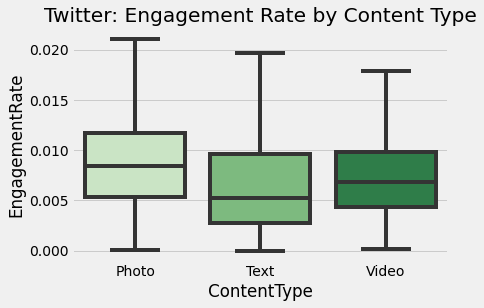

In [31]:
# Boxplot visualizing EngagementRate by Content Type for Twitter
sns.boxplot(x = tw['ContentType'], y = tw['EngagementRate'], showfliers = False, palette='Greens')
plt.title('Twitter: Engagement Rate by Content Type')

Text(0.5, 1.0, 'YouTube: Engagement Rate by Content Type')

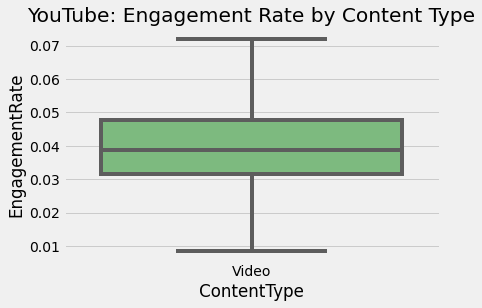

In [32]:
# Boxplot visualizing EngagementRate by Content Type for YouTube
sns.boxplot(x = yt['ContentType'], y = yt['EngagementRate'], showfliers = False, palette='Greens')
plt.title('YouTube: Engagement Rate by Content Type')

# Data Prep for Content Series Analysis

In [33]:
# Separating Tags column
tag_separated = social_df['Tags'].str.split(',', expand=True)
tag_separated = tag_separated.iloc[:,-36:].add_prefix('Tag')

social_tags = social_df.join(tag_separated)
social_tags['ID'] = social_tags.index
social_tags = social_tags.rename(columns = {'Tags':'OriginalT_ags'})

In [34]:
# New dataframe that has 1 row per tag (Possibly multiple rows for same post)
social_tags_long = pd.wide_to_long(social_tags, stubnames='Tag', i='ID', j='ContentSeries')
clean = social_tags_long.dropna(subset=['Tag'])
clean = clean.sort_values(by=['ID'])
clean = clean.droplevel(1)

In [35]:
#Extracting each unique tag from the clean dataset. This dataframe is one column that contains all the unique tags
tag_df = pd.unique(clean['Tag'])
tag_df = pd.DataFrame(tag_df)
tag_df = tag_df.sort_values(by=0)

In [36]:
# Matching the Tag with the default/generic Content Series name
master = clean.merge(content_series, on = 'Tag', how = 'left')
# Drop an outlier post
master = master[master['ServiceId'] != 1424883196148290048.0]
master = master.sort_values(by='EngagementRate', ascending=False)
master
#master.to_csv('master_content.csv')

,Message,Sentiment,OriginalT_ags,Engagement,EngagementRate,Reach,ShareCount,ServiceType,PartnerExposureDate,Impressions,...,DislikeCount,ServiceId,TapBackwardCount,SeasonYear,ReplyCount,VODViews,TapForwardCount,PaidImpressions,Tag,Content_Series_Name
84,"We love to see it, @zachwilson.",Positive,"Jets Owned,Nike ALL,Pepsi ALL,PepsiROTW,Rookie...",29481,0.2009,132138.0,NaN,Instagram,2021-10-07,146718,...,NaN,17861196710623400.0,NaN,2021,NaN,NaN,NaN,NaN,Jets Owned,NaN
83,"We love to see it, @zachwilson.",Positive,"Jets Owned,Nike ALL,Pepsi ALL,PepsiROTW,Rookie...",29481,0.2009,132138.0,NaN,Instagram,2021-10-07,146718,...,NaN,17861196710623400.0,NaN,2021,NaN,NaN,NaN,NaN,Nike ALL,NaN
82,"We love to see it, @zachwilson.",Positive,"Jets Owned,Nike ALL,Pepsi ALL,PepsiROTW,Rookie...",29481,0.2009,132138.0,NaN,Instagram,2021-10-07,146718,...,NaN,17861196710623400.0,NaN,2021,NaN,NaN,NaN,NaN,Pepsi ALL,NaN
81,"We love to see it, @zachwilson.",Positive,"Jets Owned,Nike ALL,Pepsi ALL,PepsiROTW,Rookie...",29481,0.2009,132138.0,NaN,Instagram,2021-10-07,146718,...,NaN,17861196710623400.0,NaN,2021,NaN,NaN,NaN,NaN,Rookie Of The Week,ROTW
80,"We love to see it, @zachwilson.",Positive,"Jets Owned,Nike ALL,Pepsi ALL,PepsiROTW,Rookie...",29481,0.2009,132138.0,NaN,Instagram,2021-10-07,146718,...,NaN,17861196710623400.0,NaN,2021,NaN,NaN,NaN,NaN,PepsiROTW,ROTW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502,@tinymanji 🔥🔥🔥,Objective,Jets Owned,5,0.0001,NaN,NaN,Twitter,2021-04-29,35467,...,NaN,1387763943616270080.0,NaN,2021,0.0,NaN,NaN,NaN,Jets Owned,NaN
2449,@allstarsevy 💚,Objective,Jets Owned,1,0.0000,NaN,NaN,Twitter,2021-04-20,35220,...,NaN,1384533195274820096.0,NaN,2021,0.0,NaN,NaN,NaN,Jets Owned,NaN
2699,@princessh3ather YESSSSSSSSSSSSS,Objective,Jets Owned,1,0.0000,NaN,NaN,Twitter,2021-05-13,35220,...,NaN,1392633387425410048.0,NaN,2021,0.0,NaN,NaN,NaN,Jets Owned,NaN
2764,@RevisIsTheGoat with a Twitter handle like tha...,Objective,Jets Owned,1,0.0000,NaN,NaN,Twitter,2021-05-21,35220,...,NaN,1395803258598390016.0,NaN,2021,0.0,NaN,NaN,NaN,Jets Owned,NaN


In [37]:
# Dataframe for post tags that have a generic content series name
content_series_only = master[master['Content_Series_Name'].notna()]

In [38]:
# Extracting the day of week from column "PartnerExposureDatetime"
# 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday
content_series_only['DayofWeek'] = pd.Series(content_series_only['PartnerExposureDatetime']).dt.dayofweek
# Replacing actual days of week for Day of Week Column in dataframe
dow = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
# content_series_only = content_series_only.replace({"DayofWeek": dow})
post_hour = {0:'12 am', 1: '1 am', 2: '2 am', 3: '3 am', 4: '4 am', 5: '5 am', 6: '6 am', 7: '7 am', 8: '8 am', 9: '9 am', 10: '10 am', 11: '11 am', 12: '12 pm', 13: '1 pm', 14: '2 pm', 15: '3 pm', 16: '4 pm', 17: '5 pm', 18: '6 pm', 19: '7 pm', 20: '8 pm', 21: '9 pm', 22: '10 pm', 23: '11 pm'}
# content_series_only = content_series_only.replace({"PostHour": post_hour})
# Extracting the hour from column "PartnerExposureDatetime"
content_series_only['PostHour'] = pd.to_datetime(content_series_only['PartnerExposureDatetime']).dt.hour


/var/folders/nf/rdrwqjhj2wj2tvh8kybn7f300000gn/T/ipykernel_43018/731910944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_series_only['DayofWeek'] = pd.Series(content_series_only['PartnerExposureDatetime']).dt.dayofweek
/var/folders/nf/rdrwqjhj2wj2tvh8kybn7f300000gn/T/ipykernel_43018/731910944.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_series_only['PostHour'] = pd.to_datetime(content_series_only['PartnerExposureDatetime']).dt.hour


In [39]:
# Different dataframes for each social media platform
facebook = content_series_only[content_series_only['ServiceType']=='Facebook']
instagram = content_series_only[content_series_only['ServiceType']=='Instagram']
twitter = content_series_only[content_series_only['ServiceType']=='Twitter']
youtube = content_series_only[content_series_only['ServiceType']=='YouTube']

# Q1: Content Series to be Retired Due to lack of Engagement

## Facebook

In [40]:
# Analysis for Question 1 with no threshold
facebook_low_engagement = facebook.groupby('Content_Series_Name')['EngagementRate'].describe().sort_values(by='mean', ascending=True).reset_index()
facebook_bottom_engagement = facebook_low_engagement.nsmallest(5, 'mean')
facebook_bottom_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Know Before You Go,1.0,0.001200,NaN,0.0012,0.001200,0.00120,0.001200,0.0012
1,Small Business,4.0,0.001950,0.000904,0.0006,0.001875,0.00235,0.002425,0.0025
2,3 Things to Know,15.0,0.002113,0.000629,0.0013,0.001550,0.00200,0.002650,0.0032
3,Gameday Robert Saleh,1.0,0.002300,NaN,0.0023,0.002300,0.00230,0.002300,0.0023
4,HS Player of the Week,8.0,0.002325,0.001454,0.0002,0.001525,0.00205,0.003375,0.0045


In [41]:
# Analysis for Question 1 implementing the threshold
first_quantile = facebook_low_engagement['count'].quantile(0.25)
third_quantile = facebook_low_engagement['count'].quantile(0.75)
facebook_th_low_engagement = facebook_low_engagement[facebook_low_engagement['count'].between(first_quantile, third_quantile)]
facebook_th_low_engagement = facebook_th_low_engagement.nsmallest(5, 'mean')
facebook_th_low_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
1,Small Business,4.0,0.001950,0.000904,0.0006,0.001875,0.00235,0.002425,0.0025
4,HS Player of the Week,8.0,0.002325,0.001454,0.0002,0.001525,0.00205,0.003375,0.0045
5,40 Yard Stroll,14.0,0.002536,0.001151,0.0014,0.001650,0.00205,0.003350,0.0048
6,Game Preview,12.0,0.002567,0.000716,0.0014,0.002050,0.00275,0.002900,0.0037
8,Pets,5.0,0.002820,0.000606,0.0022,0.002300,0.00290,0.003000,0.0037


In [42]:
# Lowest Engagement Rates by Content Series for Content Series above 25% quantile for 'Count'
first_quantile = facebook_low_engagement['count'].quantile(0.25)
facebook_above_first_quantile = facebook_low_engagement[facebook_low_engagement['count']>first_quantile]
facebook_above_first_quantile = facebook_above_first_quantile.nsmallest(10, 'mean')
facebook_above_first_quantile

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
1,Small Business,4.0,0.001950,0.000904,0.0006,0.001875,0.00235,0.002425,0.0025
2,3 Things to Know,15.0,0.002113,0.000629,0.0013,0.001550,0.00200,0.002650,0.0032
4,HS Player of the Week,8.0,0.002325,0.001454,0.0002,0.001525,0.00205,0.003375,0.0045
5,40 Yard Stroll,14.0,0.002536,0.001151,0.0014,0.001650,0.00205,0.003350,0.0048
6,Game Preview,12.0,0.002567,0.000716,0.0014,0.002050,0.00275,0.002900,0.0037
8,Pets,5.0,0.002820,0.000606,0.0022,0.002300,0.00290,0.003000,0.0037
9,3 Stats to Know,14.0,0.003071,0.001335,0.0017,0.002225,0.00270,0.003625,0.0067
10,Jets Gameday,7.0,0.003157,0.001656,0.0016,0.002400,0.00260,0.003200,0.0067
12,Baldy's Breakdown,29.0,0.003452,0.001321,0.0013,0.002500,0.00330,0.004200,0.0068
13,Jets Official Podcast,6.0,0.003467,0.001787,0.0014,0.002400,0.00290,0.004750,0.0060


## Instagram

In [43]:
# Analysis for Question 1 with no threshold
instagram_low_engagement = instagram.groupby('Content_Series_Name')['EngagementRate'].describe().sort_values(by='mean', ascending=True).reset_index()
instagram_bottom_engagement = instagram_low_engagement.nsmallest(5, 'mean')
instagram_bottom_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,EmpowHER,1.0,0.024200,NaN,0.0242,0.0242,0.0242,0.02420,0.0242
1,Small Business,1.0,0.037400,NaN,0.0374,0.0374,0.0374,0.03740,0.0374
2,Sundays are for Family,1.0,0.047700,NaN,0.0477,0.0477,0.0477,0.04770,0.0477
3,JetLife,1.0,0.050000,NaN,0.0500,0.0500,0.0500,0.05000,0.0500
4,National Women and Girls Day,3.0,0.050567,0.023648,0.0242,0.0409,0.0576,0.06375,0.0699


In [44]:
# Analysis for Question 1 implementing the threshold
first_quantile = instagram_low_engagement['count'].quantile(0.25)
third_quantile = instagram_low_engagement['count'].quantile(0.75)
instagram_th_low_engagement = instagram_low_engagement[instagram_low_engagement['count'].between(first_quantile, third_quantile)]
instagram_th_low_engagement = instagram_th_low_engagement.nsmallest(5, 'mean')
instagram_th_low_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
4,National Women and Girls Day,3.0,0.050567,0.023648,0.0242,0.040900,0.05760,0.063750,0.0699
5,Pets,4.0,0.054425,0.001284,0.0533,0.053600,0.05410,0.054925,0.0562
6,My Cause My Cleats,2.0,0.058600,0.019658,0.0447,0.051650,0.05860,0.065550,0.0725
8,Lip Reading,2.0,0.064150,0.019445,0.0504,0.057275,0.06415,0.071025,0.0779
9,Arrivals,7.0,0.067100,0.010593,0.0553,0.059350,0.06530,0.074300,0.0818


In [45]:
# Lowest Engagement Rates by Content Series for Content Series above 25% quantile for 'Count'
first_quantile = instagram_low_engagement['count'].quantile(0.25)
instagram_above_first_quantile = instagram_low_engagement[instagram_low_engagement['count']>first_quantile]
instagram_above_first_quantile = instagram_above_first_quantile.nsmallest(10, 'mean')
instagram_above_first_quantile

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
4,National Women and Girls Day,3.0,0.050567,0.023648,0.0242,0.040900,0.05760,0.063750,0.0699
5,Pets,4.0,0.054425,0.001284,0.0533,0.053600,0.05410,0.054925,0.0562
9,Arrivals,7.0,0.067100,0.010593,0.0553,0.059350,0.06530,0.074300,0.0818
10,Mock Draft Monday,7.0,0.068114,0.007432,0.0585,0.064000,0.06840,0.070450,0.0810
11,One Jets Drive,17.0,0.069047,0.028588,0.0461,0.058100,0.06590,0.067900,0.1715
13,Pregame Huddle,18.0,0.072494,0.015273,0.0504,0.056225,0.07495,0.084775,0.0961
15,Game Trailer,18.0,0.076656,0.018001,0.0472,0.064200,0.07420,0.084825,0.1245
16,Ticket Promo,4.0,0.076725,0.019393,0.0502,0.069325,0.08075,0.088150,0.0952
17,Gameday Graphic,16.0,0.080556,0.018847,0.0630,0.067025,0.07665,0.085425,0.1359
18,Quote Graphic,11.0,0.080973,0.010694,0.0548,0.075200,0.08480,0.088550,0.0889


## Twitter

In [46]:
# Analysis for Question 1 with no threshold
twitter_low_engagement = twitter.groupby('Content_Series_Name')['EngagementRate'].describe().sort_values(by='mean', ascending=True).reset_index()
twitter_bottom_engagement = twitter_low_engagement.nsmallest(5, 'mean')
twitter_bottom_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Tablet,5.0,0.001480,0.000130,0.0013,0.00140,0.0015,0.0016,0.0016
1,It Can't Wait,1.0,0.001900,NaN,0.0019,0.00190,0.0019,0.0019,0.0019
2,New York Urban League,1.0,0.001900,NaN,0.0019,0.00190,0.0019,0.0019,0.0019
3,Game Preview Podcast,2.0,0.002000,0.001131,0.0012,0.00160,0.0020,0.0024,0.0028
4,Inactives,15.0,0.002053,0.000769,0.0006,0.00155,0.0020,0.0025,0.0037


In [47]:
# Analysis for Question 1 implementing a middle 50% threshold
first_quantile = twitter_low_engagement['count'].quantile(0.25)
third_quantile = twitter_low_engagement['count'].quantile(0.75)
twitter_th_engagement = twitter_low_engagement[twitter_low_engagement['count'].between(first_quantile, third_quantile)]
twitter_th_engagement = twitter_th_engagement.nsmallest(5, 'mean')
twitter_th_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Tablet,5.0,0.001480,0.000130,0.0013,0.00140,0.0015,0.001600,0.0016
4,Inactives,15.0,0.002053,0.000769,0.0006,0.00155,0.0020,0.002500,0.0037
6,Stomp Out Bullying,3.0,0.002300,0.001044,0.0016,0.00170,0.0018,0.002650,0.0035
11,Dane Brugler Draft Preview Podcast,3.0,0.002667,0.001007,0.0016,0.00220,0.0028,0.003200,0.0036
12,Training Camp Live,10.0,0.002840,0.000920,0.0015,0.00215,0.0026,0.003775,0.0041


In [48]:
# Lowest Engagement Rates by Content Series for Content Series above 25% quantile for 'Count'
first_quantile = twitter_low_engagement['count'].quantile(0.25)
twitter_above_first_quantile = twitter_low_engagement[twitter_low_engagement['count']>first_quantile]
twitter_above_first_quantile = twitter_above_first_quantile.nsmallest(10, 'mean')
twitter_above_first_quantile

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Tablet,5.0,0.001480,0.000130,0.0013,0.001400,0.0015,0.001600,0.0016
4,Inactives,15.0,0.002053,0.000769,0.0006,0.001550,0.0020,0.002500,0.0037
7,Pregame Central,18.0,0.002400,0.000905,0.0008,0.001925,0.0023,0.002825,0.0048
10,Jets Overtime,19.0,0.002611,0.001828,0.0013,0.001600,0.0020,0.002550,0.0083
12,Training Camp Live,10.0,0.002840,0.000920,0.0015,0.002150,0.0026,0.003775,0.0041
14,Small Business,4.0,0.002875,0.000918,0.0019,0.002200,0.0029,0.003575,0.0038
16,Practice Today,16.0,0.002919,0.001196,0.0017,0.002075,0.0026,0.003025,0.0057
17,Pets,13.0,0.002985,0.002086,0.0011,0.001400,0.0021,0.004500,0.0068
18,The Exchange,9.0,0.003044,0.002263,0.0010,0.001800,0.0027,0.003200,0.0086
19,Tailgate Center,8.0,0.003075,0.000711,0.0019,0.002525,0.0034,0.003550,0.0038


## YouTube

In [49]:
# Analysis for Question 1 with no threshold
yt_low_engagement = youtube.groupby('Content_Series_Name')['EngagementRate'].describe().sort_values(by='mean', ascending=True).reset_index()
yt_bottom_engagement = yt_low_engagement.nsmallest(5, 'mean')
yt_bottom_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Training Camp Live,9.0,0.021889,0.002469,0.0184,0.0202,0.0216,0.0231,0.0256
1,Fan of the Year,1.0,0.022200,NaN,0.0222,0.0222,0.0222,0.0222,0.0222
2,Inside The Jets,17.0,0.030718,0.009842,0.0195,0.0240,0.0304,0.0338,0.0593
3,National Women and Girls Day,1.0,0.030800,NaN,0.0308,0.0308,0.0308,0.0308,0.0308
4,Pregame Huddle,2.0,0.032000,0.008768,0.0258,0.0289,0.0320,0.0351,0.0382


In [50]:
# Analysis for Question 1 implementing the threshold
first_quantile = yt_low_engagement['count'].quantile(0.25)
third_quantile = yt_low_engagement['count'].quantile(0.75)
yt_th_engagement = yt_low_engagement[yt_low_engagement['count'].between(first_quantile, third_quantile)]
yt_th_engagement = yt_th_engagement.nsmallest(5, 'mean')
yt_th_engagement

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Training Camp Live,9.0,0.021889,0.002469,0.0184,0.020200,0.02160,0.023100,0.0256
2,Inside The Jets,17.0,0.030718,0.009842,0.0195,0.024000,0.03040,0.033800,0.0593
4,Pregame Huddle,2.0,0.032000,0.008768,0.0258,0.028900,0.03200,0.035100,0.0382
7,Gameday Graphic,2.0,0.034550,0.009405,0.0279,0.031225,0.03455,0.037875,0.0412
8,The Roundtable,3.0,0.034667,0.001457,0.0333,0.033900,0.03450,0.035350,0.0362


In [51]:
# Lowest Engagement Rates by Content Series for Content Series above 25% quantile for 'Count'
first_quantile = yt_low_engagement['count'].quantile(0.25)
yt_above_first_quantile = yt_low_engagement[yt_low_engagement['count']>first_quantile]
yt_above_first_quantile = yt_above_first_quantile.nsmallest(10, 'mean')
yt_above_first_quantile

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Training Camp Live,9.0,0.021889,0.002469,0.0184,0.020200,0.02160,0.023100,0.0256
2,Inside The Jets,17.0,0.030718,0.009842,0.0195,0.024000,0.03040,0.033800,0.0593
5,Jets Overtime,18.0,0.032244,0.008573,0.0212,0.028025,0.03060,0.034000,0.0514
6,Senior Bowl,24.0,0.033513,0.012298,0.0086,0.030150,0.03515,0.039625,0.0581
8,The Roundtable,3.0,0.034667,0.001457,0.0333,0.033900,0.03450,0.035350,0.0362
9,Jets Official Podcast,30.0,0.034960,0.009606,0.0194,0.028925,0.03365,0.039775,0.0570
10,Practice Today,17.0,0.035265,0.008183,0.0216,0.030800,0.03570,0.040500,0.0500
11,One Jets Drive,26.0,0.036062,0.015970,0.0163,0.022425,0.03455,0.045475,0.0662
13,Highlights,47.0,0.036630,0.011913,0.0181,0.028200,0.03370,0.044300,0.0701
14,Jets Gameday,22.0,0.036941,0.007833,0.0255,0.033450,0.03560,0.040075,0.0553


# Q2: Best Time/Day to post Content Series

## Facebook

In [52]:
# Strictly for Facebook Content Series Engagement Rate by Day of Week
fb_dow_engagement = facebook.groupby('DayofWeek')['EngagementRate'].describe().sort_values(by='DayofWeek', ascending=True).reset_index()
fb_dow_engagement = fb_dow_engagement.replace({"DayofWeek": dow})
fb_dow_engagement

,DayofWeek,count,mean,std,min,25%,50%,75%,max
0,Monday,96.0,0.008899,0.005587,0.0022,0.005075,0.0077,0.010500,0.0293
1,Tuesday,101.0,0.007537,0.004904,0.0017,0.004100,0.0064,0.009400,0.0294
2,Wednesday,140.0,0.006453,0.003646,0.0010,0.003550,0.0059,0.008225,0.0164
3,Thursday,154.0,0.008095,0.005504,0.0002,0.003725,0.0072,0.010250,0.0292
4,Friday,133.0,0.006955,0.004347,0.0012,0.004000,0.0060,0.009000,0.0191
5,Saturday,75.0,0.006157,0.004282,0.0017,0.002800,0.0043,0.008300,0.0201
6,Sunday,207.0,0.009814,0.008775,0.0010,0.004750,0.0081,0.011600,0.0764


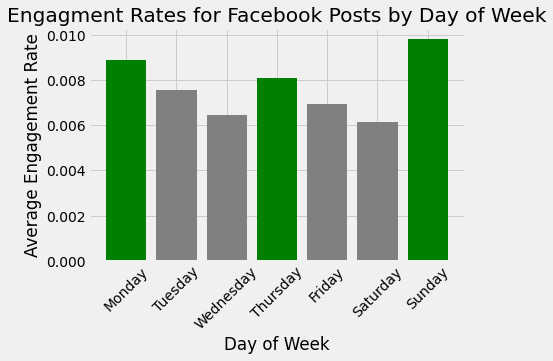

In [53]:
# BarPlot to visualize average engagement rate by day of the week
plt.bar('DayofWeek', 'mean', data=fb_dow_engagement, color=['green', 'gray', 'gray', 'green', 'gray', 'gray', 'green'])
plt.title('Engagment Rates for Facebook Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.style.use('fivethirtyeight')

### No Threshold

In [54]:
# Strictly for Facebook Content Series Engagement Rate by Post Hour
fb_hour_engagement = facebook.groupby('PostHour')['EngagementRate'].describe().sort_values(by='PostHour', ascending=True).reset_index()
fb_hour_engagement = fb_hour_engagement.replace({'PostHour': post_hour})
fb_hour_engagement

,PostHour,count,mean,std,min,25%,50%,75%,max
0,12 am,3.0,0.005467,0.000924,0.0044,0.005200,0.00600,0.006000,0.0060
1,5 am,1.0,0.009600,NaN,0.0096,0.009600,0.00960,0.009600,0.0096
2,7 am,10.0,0.006380,0.004678,0.0013,0.002625,0.00655,0.007250,0.0172
3,8 am,40.0,0.007695,0.005730,0.0015,0.003800,0.00600,0.009225,0.0249
4,9 am,48.0,0.007629,0.006487,0.0010,0.003050,0.00575,0.010300,0.0293
5,10 am,89.0,0.009449,0.008643,0.0013,0.004900,0.00850,0.010900,0.0764
6,11 am,115.0,0.007032,0.007742,0.0006,0.003400,0.00530,0.008250,0.0707
7,12 pm,132.0,0.007930,0.004777,0.0011,0.004700,0.00715,0.009600,0.0292
8,1 pm,64.0,0.008031,0.005039,0.0014,0.004150,0.00725,0.010675,0.0260
9,2 pm,70.0,0.007259,0.004975,0.0014,0.003225,0.00650,0.010525,0.0262


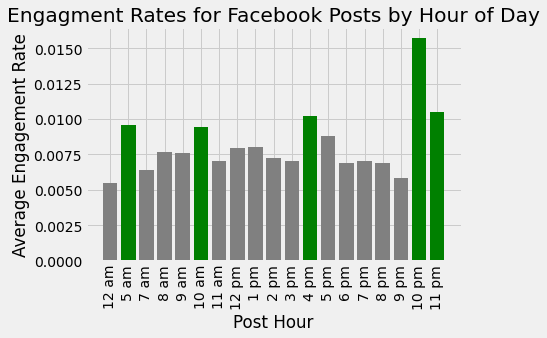

In [56]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.bar('PostHour', 'mean', data=fb_hour_engagement, color=['gray', 'green', 'gray', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'green'])
plt.title('Engagment Rates for Facebook Posts by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagement Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

### Threshold of top 75% Post Count

In [57]:
# Implement a threshold of the top 75% of post hours by count. Reduces influence of outliers and shows more realistic view of majority of social media posts
threshold = fb_hour_engagement['count'].quantile(0.25)
fb_hour_engagement_top75 = fb_hour_engagement[fb_hour_engagement['count']>threshold]
fb_hour_engagement_top75

,PostHour,count,mean,std,min,25%,50%,75%,max
2,7 am,10.0,0.006380,0.004678,0.0013,0.002625,0.00655,0.007250,0.0172
3,8 am,40.0,0.007695,0.005730,0.0015,0.003800,0.00600,0.009225,0.0249
4,9 am,48.0,0.007629,0.006487,0.0010,0.003050,0.00575,0.010300,0.0293
5,10 am,89.0,0.009449,0.008643,0.0013,0.004900,0.00850,0.010900,0.0764
6,11 am,115.0,0.007032,0.007742,0.0006,0.003400,0.00530,0.008250,0.0707
7,12 pm,132.0,0.007930,0.004777,0.0011,0.004700,0.00715,0.009600,0.0292
8,1 pm,64.0,0.008031,0.005039,0.0014,0.004150,0.00725,0.010675,0.0260
9,2 pm,70.0,0.007259,0.004975,0.0014,0.003225,0.00650,0.010525,0.0262
10,3 pm,94.0,0.007059,0.003693,0.0002,0.004525,0.00720,0.008500,0.0191
11,4 pm,64.0,0.010216,0.005786,0.0019,0.005750,0.00880,0.013950,0.0294


(0.002, 0.01)

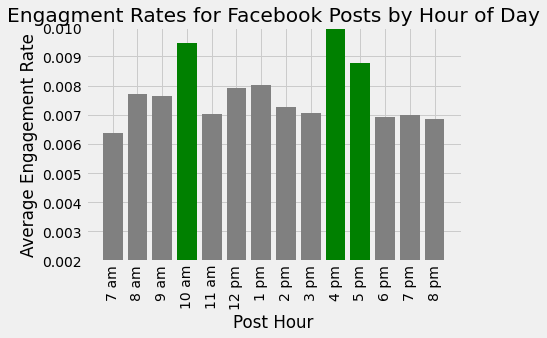

In [58]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.style.use('fivethirtyeight')
plt.bar('PostHour', 'mean', data=fb_hour_engagement_top75, color=['gray', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'green', 'gray', 'gray', 'gray'])
plt.title('Engagment Rates for Facebook Posts by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagement Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylim(0.002, 0.01)

## Instagram

In [59]:
# Strictly for Instagram Content Series Engagement Rate by Day of Week
insta_dow_engagement = instagram.groupby('DayofWeek')['EngagementRate'].describe().sort_values(by='DayofWeek', ascending=True).reset_index()
insta_dow_engagement = insta_dow_engagement.replace({"DayofWeek": dow})
insta_dow_engagement

,DayofWeek,count,mean,std,min,25%,50%,75%,max
0,Monday,33.0,0.092324,0.025470,0.0585,0.0752,0.08460,0.10510,0.1543
1,Tuesday,43.0,0.091874,0.020708,0.0494,0.0802,0.09050,0.10590,0.1353
2,Wednesday,25.0,0.084944,0.032514,0.0242,0.0582,0.08580,0.11620,0.1384
3,Thursday,59.0,0.098559,0.035118,0.0374,0.0750,0.09150,0.12130,0.2009
4,Friday,44.0,0.090486,0.025271,0.0471,0.0731,0.09075,0.10455,0.1715
5,Saturday,29.0,0.085228,0.018999,0.0480,0.0746,0.08300,0.09860,0.1186
6,Sunday,81.0,0.085078,0.026063,0.0504,0.0662,0.07990,0.09210,0.1730


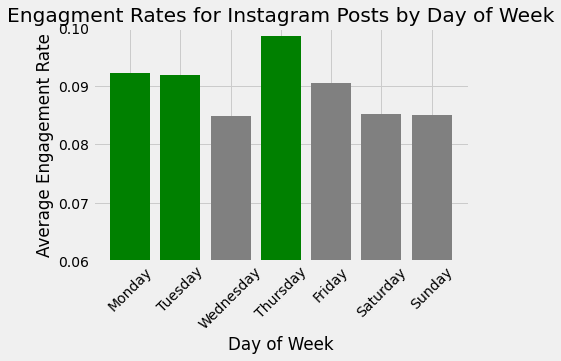

In [60]:
# BarPlot to visualize average engagement rate by day of the week
plt.bar('DayofWeek', 'mean', data=insta_dow_engagement, color=['green', 'green', 'gray', 'green', 'gray', 'gray', 'gray'])
plt.title('Engagment Rates for Instagram Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate')
plt.ylim(0.06, 0.1)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.style.use('fivethirtyeight')

### No Threshold

In [61]:
# Strictly for Instagram Content Series Engagement Rate by Post Hour
insta_hour_engagement = instagram.groupby('PostHour')['EngagementRate'].describe().sort_values(by='PostHour', ascending=True).reset_index()
insta_hour_engagement = insta_hour_engagement.replace({'PostHour': post_hour})
insta_hour_engagement

,PostHour,count,mean,std,min,25%,50%,75%,max
0,5 am,1.0,0.063000,NaN,0.0630,0.063000,0.06300,0.063000,0.0630
1,7 am,5.0,0.090560,0.028477,0.0630,0.075400,0.08340,0.093600,0.1374
2,8 am,20.0,0.081430,0.027078,0.0242,0.070750,0.07890,0.095950,0.1359
3,9 am,18.0,0.094672,0.025211,0.0595,0.077850,0.08555,0.104575,0.1543
4,10 am,22.0,0.099918,0.026494,0.0562,0.082325,0.10020,0.111450,0.1715
5,11 am,36.0,0.084269,0.023571,0.0374,0.067125,0.08390,0.103725,0.1269
6,12 pm,47.0,0.094038,0.026115,0.0504,0.074600,0.08890,0.117450,0.1474
7,1 pm,32.0,0.095166,0.034348,0.0523,0.077350,0.08855,0.099200,0.2009
8,2 pm,22.0,0.086255,0.021367,0.0447,0.073625,0.08940,0.097750,0.1366
9,3 pm,32.0,0.091597,0.022625,0.0471,0.075500,0.09000,0.109225,0.1333


(0.02, 0.11)

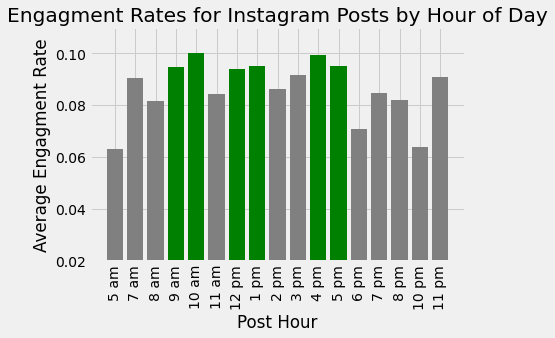

In [62]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.bar('PostHour', 'mean', data=insta_hour_engagement, color=['gray', 'gray', 'gray', 'green', 'green', 'gray', 'green', 'green', 'gray', 'gray', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.style.use('fivethirtyeight')
plt.title('Engagment Rates for Instagram Posts by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagment Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylim(0.02,0.11)

### Top 75% Threshold for Post Count

In [63]:
# Implement a threshold of the top 75% of post hours by count. Reduces influence of outliers and shows more realistic view of majority of social media posts
threshold = insta_hour_engagement['count'].quantile(0.25)
insta_hour_engagement_top75 = insta_hour_engagement[insta_hour_engagement['count']>threshold]
insta_hour_engagement_top75

,PostHour,count,mean,std,min,25%,50%,75%,max
2,8 am,20.0,0.081430,0.027078,0.0242,0.070750,0.07890,0.095950,0.1359
3,9 am,18.0,0.094672,0.025211,0.0595,0.077850,0.08555,0.104575,0.1543
4,10 am,22.0,0.099918,0.026494,0.0562,0.082325,0.10020,0.111450,0.1715
5,11 am,36.0,0.084269,0.023571,0.0374,0.067125,0.08390,0.103725,0.1269
6,12 pm,47.0,0.094038,0.026115,0.0504,0.074600,0.08890,0.117450,0.1474
7,1 pm,32.0,0.095166,0.034348,0.0523,0.077350,0.08855,0.099200,0.2009
8,2 pm,22.0,0.086255,0.021367,0.0447,0.073625,0.08940,0.097750,0.1366
9,3 pm,32.0,0.091597,0.022625,0.0471,0.075500,0.09000,0.109225,0.1333
10,4 pm,24.0,0.099279,0.031643,0.0500,0.078400,0.09260,0.121025,0.1730
11,5 pm,9.0,0.095233,0.033228,0.0494,0.081500,0.08330,0.116700,0.1531


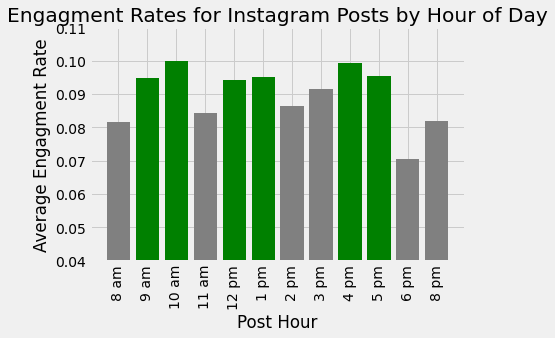

In [64]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.bar('PostHour', 'mean', data=insta_hour_engagement_top75, color=['gray', 'green', 'green', 'gray', 'green', 'green', 'gray', 'gray', 'green', 'green', 'gray', 'gray'])
plt.title('Engagment Rates for Instagram Posts by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagment Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylim(0.04,0.11)
plt.style.use('fivethirtyeight')
plt.savefig('insta_ph_engagement.png',dpi=300, bbox_inches='tight')

## Twitter

In [65]:
# Strictly for Twitter Content Series Engagement Rate by Day of Week
tw_dow_engagement = twitter.groupby('DayofWeek')['EngagementRate'].describe().sort_values(by='DayofWeek', ascending=True).reset_index()
tw_dow_engagement = tw_dow_engagement.replace({"DayofWeek": dow})
tw_dow_engagement

,DayofWeek,count,mean,std,min,25%,50%,75%,max
0,Monday,183.0,0.005986,0.004231,0.0010,0.002800,0.00460,0.007800,0.0210
1,Tuesday,143.0,0.006291,0.003872,0.0011,0.003300,0.00500,0.008550,0.0192
2,Wednesday,182.0,0.004587,0.002742,0.0007,0.002800,0.00380,0.005875,0.0188
3,Thursday,184.0,0.005971,0.004055,0.0006,0.003200,0.00450,0.007300,0.0258
4,Friday,210.0,0.005173,0.003389,0.0002,0.003000,0.00430,0.006200,0.0191
5,Saturday,116.0,0.006220,0.003320,0.0011,0.003575,0.00565,0.008025,0.0154
6,Sunday,428.0,0.006538,0.003725,0.0008,0.003700,0.00590,0.009125,0.0207


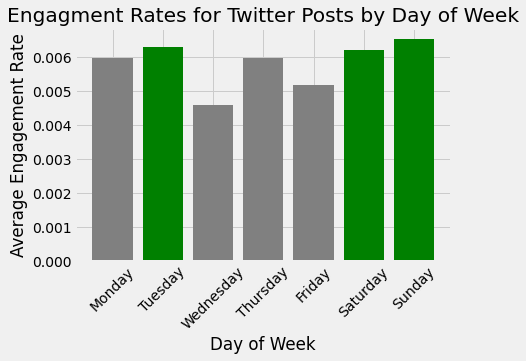

In [66]:
# BarPlot to visualize average engagement rate by day of the week
plt.bar('DayofWeek', 'mean', data=tw_dow_engagement, color=['gray', 'green', 'gray', 'gray', 'gray', 'green', 'green'])
plt.title('Engagment Rates for Twitter Posts by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.style.use('fivethirtyeight')

### No Threshold

In [67]:
# Strictly for Twitter Content Series Engagement Rate by Post Hour
tw_hour_engagement = twitter.groupby('PostHour')['EngagementRate'].describe().sort_values(by='PostHour', ascending=True).reset_index()
tw_hour_engagement = tw_hour_engagement.replace({'PostHour': post_hour})
tw_hour_engagement

,PostHour,count,mean,std,min,25%,50%,75%,max
0,12 am,5.0,0.005200,0.002074,0.0016,0.005600,0.00560,0.006600,0.0066
1,5 am,1.0,0.010300,NaN,0.0103,0.010300,0.01030,0.010300,0.0103
2,7 am,16.0,0.007519,0.002954,0.0031,0.006125,0.00720,0.008700,0.0144
3,8 am,38.0,0.006658,0.004737,0.0007,0.003425,0.00500,0.009550,0.0194
4,9 am,83.0,0.006925,0.004333,0.0008,0.003500,0.00580,0.010200,0.0191
5,10 am,111.0,0.005510,0.003657,0.0002,0.002950,0.00430,0.006900,0.0188
6,11 am,195.0,0.004401,0.002764,0.0008,0.002550,0.00350,0.005400,0.0160
7,12 pm,154.0,0.006852,0.003890,0.0011,0.003725,0.00620,0.009300,0.0191
8,1 pm,153.0,0.007466,0.004057,0.0011,0.004700,0.00680,0.009800,0.0258
9,2 pm,118.0,0.005671,0.003549,0.0011,0.002900,0.00480,0.007175,0.0187


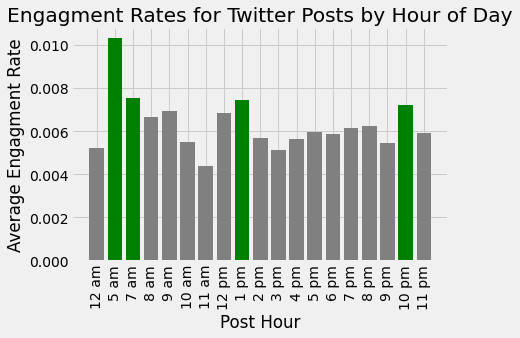

In [68]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.bar('PostHour', 'mean', data=tw_hour_engagement, color=['gray', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'gray'])
plt.title('Engagment Rates for Twitter Posts by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagment Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')
plt.savefig('tw_hour_engagement.png',dpi=300, bbox_inches='tight')

### Threshold of 75% in terms of Post Count

In [69]:
# Implement a threshold of the top 75% of post hours by count. Reduces influence of outliers and shows more realistic view of majority of social media posts
threshold = tw_hour_engagement['count'].quantile(0.25)
tw_hour_engagement_top75 = tw_hour_engagement[tw_hour_engagement['count']>threshold]
tw_hour_engagement_top75

,PostHour,count,mean,std,min,25%,50%,75%,max
2,7 am,16.0,0.007519,0.002954,0.0031,0.006125,0.00720,0.008700,0.0144
3,8 am,38.0,0.006658,0.004737,0.0007,0.003425,0.00500,0.009550,0.0194
4,9 am,83.0,0.006925,0.004333,0.0008,0.003500,0.00580,0.010200,0.0191
5,10 am,111.0,0.005510,0.003657,0.0002,0.002950,0.00430,0.006900,0.0188
6,11 am,195.0,0.004401,0.002764,0.0008,0.002550,0.00350,0.005400,0.0160
7,12 pm,154.0,0.006852,0.003890,0.0011,0.003725,0.00620,0.009300,0.0191
8,1 pm,153.0,0.007466,0.004057,0.0011,0.004700,0.00680,0.009800,0.0258
9,2 pm,118.0,0.005671,0.003549,0.0011,0.002900,0.00480,0.007175,0.0187
10,3 pm,197.0,0.005134,0.002964,0.0011,0.003000,0.00440,0.006400,0.0192
11,4 pm,153.0,0.005631,0.003073,0.0013,0.003400,0.00460,0.007100,0.0164


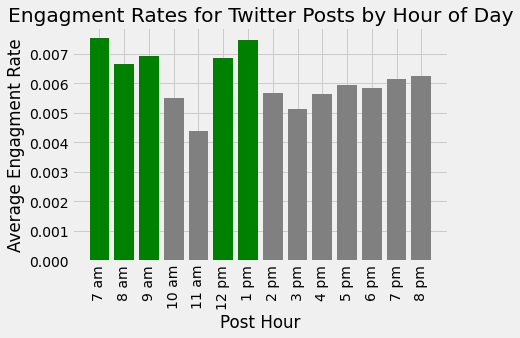

In [70]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.bar('PostHour', 'mean', data=tw_hour_engagement_top75, color=['green', 'green', 'green', 'gray', 'gray', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
plt.title('Engagment Rates for Twitter Posts by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagment Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')
plt.savefig('tw_ph_engagement.png',dpi=300, bbox_inches='tight')

## YouTube

In [71]:
# Strictly for Twitter Content Series Engagement Rate by Day of Week
yt_dow_engagement = youtube.groupby('DayofWeek')['EngagementRate'].describe().sort_values(by='DayofWeek', ascending=True).reset_index()
yt_dow_engagement = yt_dow_engagement.replace({"DayofWeek": dow})
yt_dow_engagement

,DayofWeek,count,mean,std,min,25%,50%,75%,max
0,Monday,184.0,0.049233,0.014362,0.0240,0.0381,0.04780,0.057700,0.1105
1,Tuesday,166.0,0.043125,0.015338,0.0163,0.0318,0.04090,0.054925,0.0839
2,Wednesday,192.0,0.045146,0.014109,0.0119,0.0358,0.04260,0.050800,0.1082
3,Thursday,217.0,0.040673,0.012180,0.0177,0.0325,0.03890,0.046800,0.0825
4,Friday,180.0,0.044771,0.014955,0.0086,0.0349,0.04205,0.053225,0.0998
5,Saturday,66.0,0.043883,0.014082,0.0202,0.0361,0.04020,0.047775,0.0781
6,Sunday,287.0,0.043093,0.012399,0.0181,0.0339,0.04180,0.050300,0.0923


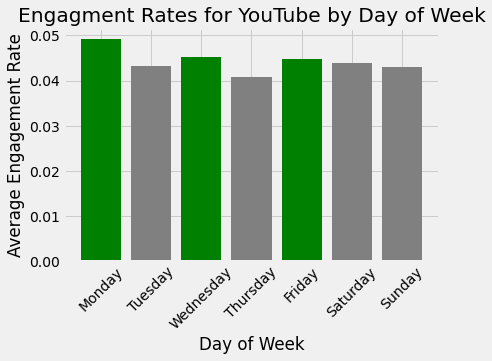

In [72]:
# BarPlot to visualize average engagement rate by day of the week
plt.bar('DayofWeek', 'mean', data=yt_dow_engagement, color=['green', 'gray', 'green', 'gray', 'green', 'gray', 'gray'])
plt.title('Engagment Rates for YouTube by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Engagement Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.style.use('fivethirtyeight')

### No Threshold

In [73]:
# Strictly for Twitter Content Series Engagement Rate by Post Hour
yt_hour_engagement = youtube.groupby('PostHour')['EngagementRate'].describe().sort_values(by='PostHour', ascending=True).reset_index()
yt_hour_engagement = yt_hour_engagement.replace({'PostHour': post_hour})
yt_hour_engagement

,PostHour,count,mean,std,min,25%,50%,75%,max
0,12 am,14.0,0.050657,0.011304,0.0378,0.041575,0.04875,0.054100,0.0728
1,1 am,1.0,0.051400,NaN,0.0514,0.051400,0.05140,0.051400,0.0514
2,2 am,3.0,0.044200,0.010912,0.0379,0.037900,0.03790,0.047350,0.0568
3,7 am,11.0,0.044000,0.013237,0.0279,0.034700,0.04500,0.048200,0.0653
4,8 am,30.0,0.049403,0.014857,0.0257,0.036200,0.04720,0.063275,0.0728
5,9 am,86.0,0.045528,0.015838,0.0222,0.034150,0.04085,0.054700,0.0922
6,10 am,64.0,0.042295,0.017938,0.0086,0.031400,0.03760,0.052025,0.1082
7,11 am,144.0,0.044260,0.013944,0.0170,0.034900,0.04025,0.053475,0.0781
8,12 pm,60.0,0.042910,0.017671,0.0105,0.032025,0.04020,0.048000,0.1105
9,1 pm,75.0,0.043567,0.012706,0.0177,0.034500,0.04170,0.051450,0.0825


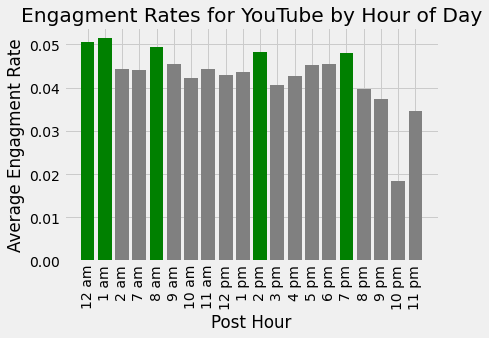

In [74]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.bar('PostHour', 'mean', data=yt_hour_engagement, color=['green', 'green', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray'])
plt.title('Engagment Rates for YouTube by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagment Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

### Threshold of 75% in terms of Post Count

In [75]:
# Implement a threshold of the top 75% of post hours by count. Reduces influence of outliers and shows more realistic view of majority of social media posts
threshold = yt_hour_engagement['count'].quantile(0.25)
yt_hour_engagement_top75 = yt_hour_engagement[yt_hour_engagement['count']>threshold]
yt_hour_engagement_top75

,PostHour,count,mean,std,min,25%,50%,75%,max
0,12 am,14.0,0.050657,0.011304,0.0378,0.041575,0.04875,0.054100,0.0728
3,7 am,11.0,0.044000,0.013237,0.0279,0.034700,0.04500,0.048200,0.0653
4,8 am,30.0,0.049403,0.014857,0.0257,0.036200,0.04720,0.063275,0.0728
5,9 am,86.0,0.045528,0.015838,0.0222,0.034150,0.04085,0.054700,0.0922
6,10 am,64.0,0.042295,0.017938,0.0086,0.031400,0.03760,0.052025,0.1082
7,11 am,144.0,0.044260,0.013944,0.0170,0.034900,0.04025,0.053475,0.0781
8,12 pm,60.0,0.042910,0.017671,0.0105,0.032025,0.04020,0.048000,0.1105
9,1 pm,75.0,0.043567,0.012706,0.0177,0.034500,0.04170,0.051450,0.0825
10,2 pm,95.0,0.048317,0.015148,0.0195,0.038850,0.04510,0.057050,0.0845
11,3 pm,136.0,0.040670,0.013377,0.0119,0.032750,0.03915,0.045100,0.1000


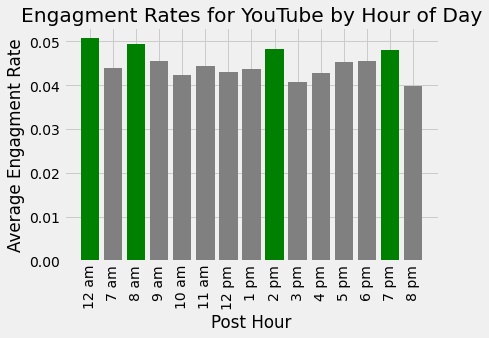

In [76]:
# Bar Plot visualizing Average Engagment Rate by Post Hour
plt.bar('PostHour', 'mean', data=yt_hour_engagement_top75, color=['green', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'green', 'gray', 'gray', 'gray', 'gray', 'green', 'gray'])
plt.title('Engagment Rates for YouTube by Hour of Day')
plt.xlabel('Post Hour')
plt.ylabel('Average Engagment Rate')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.style.use('fivethirtyeight')

# Q3: Which Content Series Drove High Follower Growth

## Facebook

In [77]:
fb_follower_change = facebook.sort_values(by = 'PartnerExposureDatetime', ascending=True)
fb_follower_change['follower_change'] = fb_follower_change['FollowerCount'].diff().shift(periods = -1)
fb_delta = fb_follower_change[['ServiceId', 'follower_change']]

### No Threshold

In [78]:
# Strictly for Facebook Content Series Follower Growth
fb_follower_change = facebook.merge(fb_delta, how='left', on='ServiceId')
fb_follower_change = fb_follower_change.groupby('Content_Series_Name')['follower_change'].describe().sort_values(by='mean', ascending=False).reset_index()
fb_follower_no_thresh = fb_follower_change.nlargest(10, 'mean')
fb_follower_no_thresh

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Pets,5.0,43.400000,121.271596,-41.0,0.0,0.0,0.0,258.0
1,Transaction,34.0,42.294118,514.841342,-797.0,-79.5,0.0,0.0,1340.0
2,Score Graphic,43.0,2.000000,13.114877,0.0,0.0,0.0,0.0,86.0
3,Lip Reading,9.0,1.555556,4.666667,0.0,0.0,0.0,0.0,14.0
4,Gameday Graphic,17.0,1.294118,24.384331,-39.0,0.0,0.0,0.0,86.0
5,Crucial Catch,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
6,Game Poster,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
7,Kid Reporter,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,Drive Summary,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
9,Training Camp Live,10.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


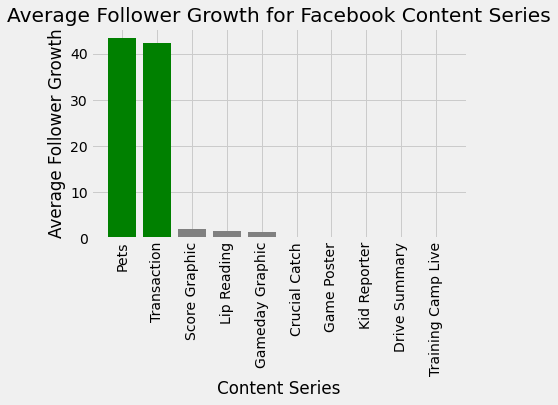

In [79]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=fb_follower_no_thresh, color=['green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.subplots_adjust(bottom=0.15)
plt.title('Average Follower Growth for Facebook Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.style.use('fivethirtyeight')

### 75% Post Count Threshold

In [80]:
fb_threshold =fb_follower_change['count'].quantile(0.25)
fb_top_follower_changes=fb_follower_change[fb_follower_change['count']>fb_threshold]
fb_top10 = fb_top_follower_changes.nlargest(10,'mean')
fb_top10

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Pets,5.0,43.400000,121.271596,-41.0,0.0,0.0,0.0,258.0
1,Transaction,34.0,42.294118,514.841342,-797.0,-79.5,0.0,0.0,1340.0
2,Score Graphic,43.0,2.000000,13.114877,0.0,0.0,0.0,0.0,86.0
3,Lip Reading,9.0,1.555556,4.666667,0.0,0.0,0.0,0.0,14.0
4,Gameday Graphic,17.0,1.294118,24.384331,-39.0,0.0,0.0,0.0,86.0
7,Kid Reporter,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,Training Camp Live,10.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
12,Arrivals,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
14,Selfie Video,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
18,Practice Today,19.0,-0.631579,2.752989,-12.0,0.0,0.0,0.0,0.0


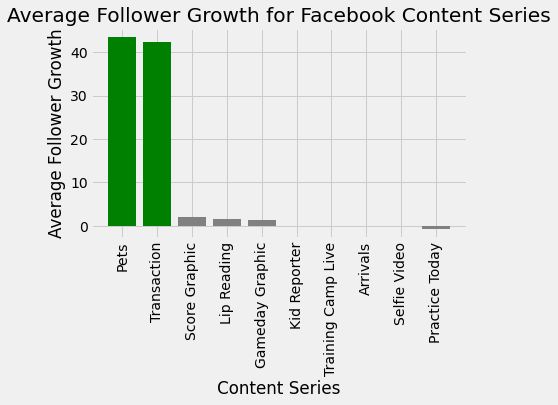

In [81]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=fb_top10, color=['green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.subplots_adjust(bottom=0.15)
plt.title('Average Follower Growth for Facebook Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.style.use('fivethirtyeight')

## Instagram

In [82]:
insta_follower_change = instagram.sort_values(by = 'PartnerExposureDatetime', ascending=True)
insta_follower_change['follower_change'] = insta_follower_change['FollowerCount'].diff().shift(periods = -1)
insta_delta = insta_follower_change[['ServiceId', 'follower_change']]

### No Threshold

In [83]:
# Strictly for Instagram Content Series Follower Growth
insta_follower_change = instagram.merge(insta_delta, how='left', on='ServiceId')
insta_follower_change = insta_follower_change.groupby('Content_Series_Name')['follower_change'].describe().sort_values(by='mean', ascending=False).reset_index()
insta_follower_no_thresh = insta_follower_change.nlargest(10, 'mean')
insta_follower_no_thresh

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Victory Speech,4.0,470.250000,596.194809,0.0,0.00,319.5,789.75,1242.0
1,Flight 2022,1.0,359.000000,NaN,359.0,359.00,359.0,359.00,359.0
2,Flight Cam,9.0,292.333333,490.644474,0.0,0.00,34.0,288.00,1471.0
3,#VICTORYMONDAY,2.0,269.500000,13.435029,260.0,264.75,269.5,274.25,279.0
4,Transaction,22.0,207.863636,739.524770,-1963.0,0.00,0.0,298.25,1963.0
5,ROTW,66.0,206.909091,1006.780210,-260.0,0.00,0.0,35.25,5817.0
6,Gameday Graphic,16.0,191.750000,708.858848,0.0,0.00,0.0,24.75,2848.0
7,Pets,4.0,160.500000,263.763151,0.0,9.75,44.5,195.25,553.0
8,Score Graphic,21.0,142.619048,331.112591,0.0,0.00,0.0,0.00,1122.0
9,Meme,2.0,140.500000,198.697006,0.0,70.25,140.5,210.75,281.0


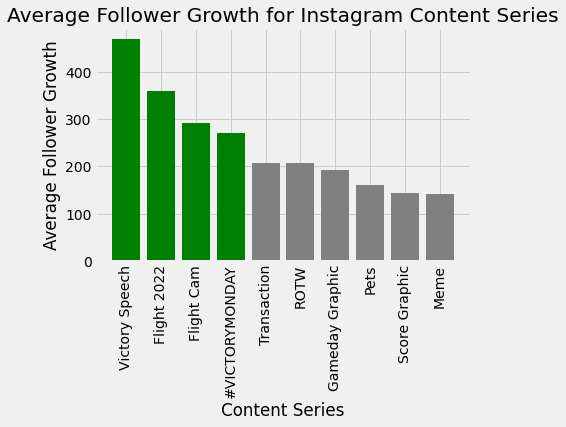

In [84]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=insta_follower_no_thresh, color=['green', 'green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.title('Average Follower Growth for Instagram Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.style.use('fivethirtyeight')

### 75% Threshold in terms of Post Count

In [85]:
insta_threshold =insta_follower_change['count'].quantile(0.25)
insta_top_follower_changes=insta_follower_change[insta_follower_change['count']>insta_threshold]
insta_top10 = insta_top_follower_changes.nlargest(10,'mean')
insta_top10

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Victory Speech,4.0,470.250000,596.194809,0.0,0.00,319.5,789.75,1242.0
2,Flight Cam,9.0,292.333333,490.644474,0.0,0.00,34.0,288.00,1471.0
4,Transaction,22.0,207.863636,739.524770,-1963.0,0.00,0.0,298.25,1963.0
5,ROTW,66.0,206.909091,1006.780210,-260.0,0.00,0.0,35.25,5817.0
6,Gameday Graphic,16.0,191.750000,708.858848,0.0,0.00,0.0,24.75,2848.0
7,Pets,4.0,160.500000,263.763151,0.0,9.75,44.5,195.25,553.0
8,Score Graphic,21.0,142.619048,331.112591,0.0,0.00,0.0,0.00,1122.0
10,Senior Bowl,10.0,132.100000,150.503931,0.0,13.25,73.5,197.00,453.0
11,Mock Draft Monday,7.0,131.428571,247.791483,-8.0,0.00,0.0,126.50,675.0
12,National Women and Girls Day,4.0,131.250000,262.500000,0.0,0.00,0.0,131.25,525.0


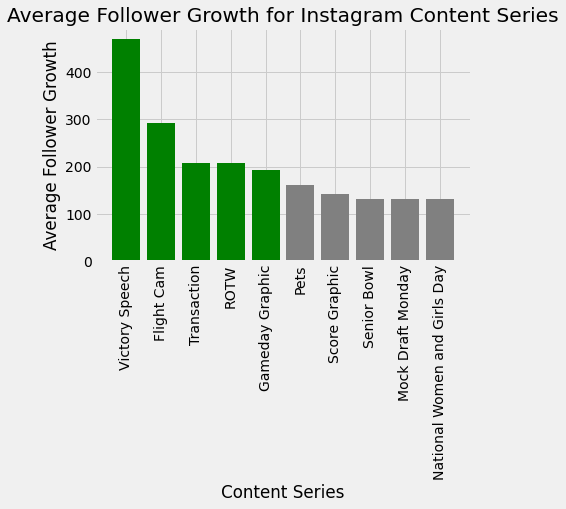

In [86]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=insta_top10, color=['green', 'green', 'green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.title('Average Follower Growth for Instagram Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.style.use('fivethirtyeight')
plt.savefig('instagram_follower_growth.png', dpi=300, bbox_inches='tight')

## Twitter

In [87]:
tw_follower_change = twitter.sort_values(by = 'PartnerExposureDatetime', ascending=True)
tw_follower_change['follower_change'] = tw_follower_change['FollowerCount'].diff().shift(periods = -1)
tw_delta = tw_follower_change[['ServiceId', 'follower_change']]

### No Threshold

In [88]:
# Strictly for Twitter Content Series Follower Growth
tw_follower_change = twitter.merge(tw_delta, how='left', on='ServiceId')
tw_follower_change = tw_follower_change.groupby('Content_Series_Name')['follower_change'].describe().sort_values(by='mean', ascending=False).reset_index()
tw_follower_no_thresh = tw_follower_change.nlargest(10, 'mean')
tw_follower_no_thresh

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Small Business,4.0,758.250000,714.089338,23.0,207.50,816.0,1366.75,1378.0
1,Victory Speech,4.0,738.500000,815.791844,0.0,51.75,717.5,1404.25,1519.0
2,Gameday Guide,16.0,671.187500,920.901386,-1284.0,14.00,694.5,1405.25,2181.0
3,Kid Reporter,3.0,568.000000,910.250515,2.0,43.00,84.0,851.00,1618.0
4,Practice Today,16.0,523.625000,669.289262,-9.0,2.25,20.5,1344.00,1403.0
5,Dane Brugler Draft Preview Podcast,4.0,504.500000,922.998917,0.0,13.50,65.5,556.50,1887.0
6,Jets Overtime,27.0,385.370370,620.315004,0.0,0.00,20.0,766.50,1498.0
7,Tablet,10.0,285.000000,574.720608,0.0,0.00,5.5,50.00,1407.0
8,Transaction,103.0,282.058252,662.818105,-1352.0,0.00,13.0,113.50,1536.0
9,The Official Jets Podcast,12.0,278.833333,519.108823,0.0,0.00,13.0,248.00,1389.0


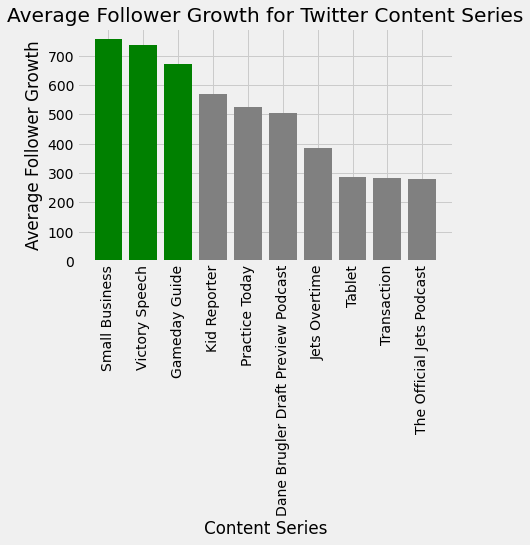

In [89]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=tw_follower_no_thresh, color=['green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.title('Average Follower Growth for Twitter Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.style.use('fivethirtyeight')

### 75% Post Count Threshold

In [90]:
tw_threshold =tw_follower_change['count'].quantile(0.25)
tw_top_follower_changes=tw_follower_change[tw_follower_change['count']>tw_threshold]
tw_top10 = tw_top_follower_changes.nlargest(10,'mean')
tw_top10

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
2,Gameday Guide,16.0,671.187500,920.901386,-1284.0,14.00,694.5,1405.25,2181.0
4,Practice Today,16.0,523.625000,669.289262,-9.0,2.25,20.5,1344.00,1403.0
6,Jets Overtime,27.0,385.370370,620.315004,0.0,0.00,20.0,766.50,1498.0
7,Tablet,10.0,285.000000,574.720608,0.0,0.00,5.5,50.00,1407.0
8,Transaction,103.0,282.058252,662.818105,-1352.0,0.00,13.0,113.50,1536.0
9,The Official Jets Podcast,12.0,278.833333,519.108823,0.0,0.00,13.0,248.00,1389.0
10,Injury Report,16.0,277.312500,732.858942,-1325.0,3.75,36.5,401.75,1400.0
11,Gameday Poster,6.0,257.833333,971.478135,-1213.0,13.75,24.0,1019.00,1351.0
12,Jets Official Podcast,14.0,239.428571,487.903792,0.0,0.00,3.0,189.50,1389.0
13,Walter Payton Man of the Year,7.0,203.142857,1203.213950,-1338.0,-650.50,2.0,1346.00,1367.0


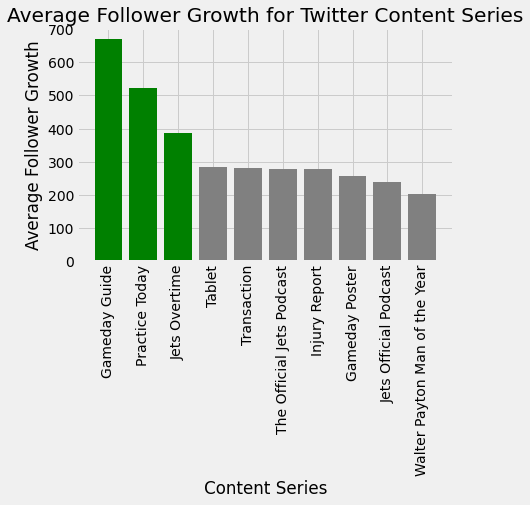

In [91]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=tw_top10, color=['green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.title('Average Follower Growth for Twitter Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.style.use('fivethirtyeight')
plt.savefig('twitter_follower_growth.png', dpi=300, bbox_inches='tight')

## YouTube

In [92]:
yt_follower_change = youtube.sort_values(by = 'PartnerExposureDatetime', ascending=True)
yt_follower_change['follower_change'] = yt_follower_change['FollowerCount'].diff().shift(periods = -1)
yt_delta = yt_follower_change[['ServiceId', 'follower_change']]

### No Threshold

In [93]:
# Strictly for Facebook Content Series Follower Growth
yt_follower_change = youtube.merge(yt_delta, how='left', on='ServiceId')
yt_follower_change = yt_follower_change.groupby('Content_Series_Name')['follower_change'].describe().sort_values(by='mean', ascending=False).reset_index()
yt_follower_no_thresh = yt_follower_change.nlargest(10, 'mean')
yt_follower_no_thresh

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Training Camp Live,9.0,322.222222,2315.047396,-3000.0,0.0,0.0,0.0,5900.0
1,National Women and Girls Day,1.0,200.000000,NaN,200.0,200.0,200.0,200.0,200.0
2,One Jets Drive,42.0,142.857143,645.110260,-100.0,0.0,0.0,0.0,3400.0
3,Dane Brugler Draft Preview Podcast,10.0,60.000000,157.762128,0.0,0.0,0.0,0.0,500.0
4,Keelan's Questions,2.0,50.000000,70.710678,0.0,25.0,50.0,75.0,100.0
5,Jets Overtime,26.0,50.000000,102.956301,0.0,0.0,0.0,75.0,400.0
6,Tablet,19.0,47.368421,102.026255,0.0,0.0,0.0,50.0,400.0
7,Season Ticket Holder Call,3.0,33.333333,57.735027,0.0,0.0,0.0,50.0,100.0
8,Pregame Central,27.0,33.333333,96.076892,0.0,0.0,0.0,0.0,400.0
9,Practice Today,24.0,25.000000,145.213486,-500.0,0.0,0.0,100.0,400.0


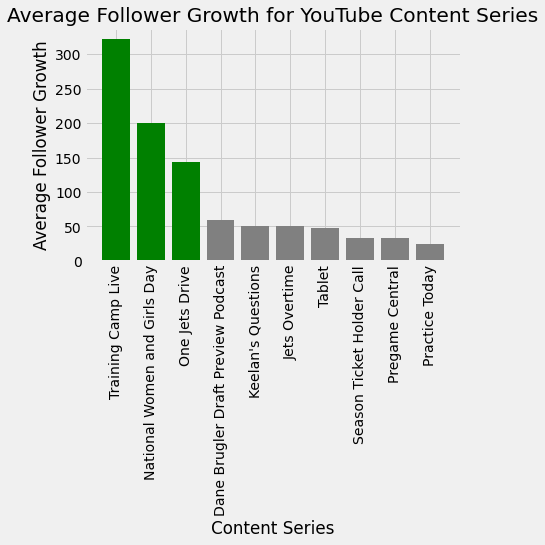

In [94]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=yt_follower_no_thresh, color=['green', 'green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.title('Average Follower Growth for YouTube Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.style.use('fivethirtyeight')
plt.savefig('youtube_follower_growth_noth.png', dpi=300, bbox_inches='tight')

### 75% Threshold for Post Count

In [95]:
yt_threshold =yt_follower_change['count'].quantile(0.25)
yt_top_follower_changes=yt_follower_change[yt_follower_change['count']>yt_threshold]
yt_top10 = yt_top_follower_changes.nlargest(10,'mean')
yt_top10

,Content_Series_Name,count,mean,std,min,25%,50%,75%,max
0,Training Camp Live,9.0,322.222222,2315.047396,-3000.0,0.0,0.0,0.0,5900.0
2,One Jets Drive,42.0,142.857143,645.110260,-100.0,0.0,0.0,0.0,3400.0
3,Dane Brugler Draft Preview Podcast,10.0,60.000000,157.762128,0.0,0.0,0.0,0.0,500.0
5,Jets Overtime,26.0,50.000000,102.956301,0.0,0.0,0.0,75.0,400.0
6,Tablet,19.0,47.368421,102.026255,0.0,0.0,0.0,50.0,400.0
8,Pregame Central,27.0,33.333333,96.076892,0.0,0.0,0.0,0.0,400.0
9,Practice Today,24.0,25.000000,145.213486,-500.0,0.0,0.0,100.0,400.0
10,My Cause My Cleats,4.0,25.000000,50.000000,0.0,0.0,0.0,25.0,100.0
11,The Exchange,5.0,20.000000,44.721360,0.0,0.0,0.0,0.0,100.0
12,Baldy's Breakdown,56.0,19.642857,127.092869,-100.0,0.0,0.0,0.0,800.0


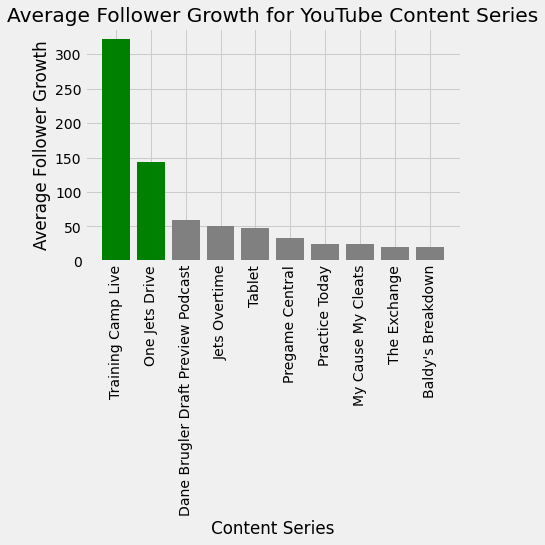

In [96]:
# Plot
plt.bar('Content_Series_Name', 'mean', data=yt_top10, color=['green', 'green', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
locs, labels = plt.xticks()
plt.title('Average Follower Growth for YouTube Content Series')
plt.ylabel('Average Follower Growth')
plt.xlabel('Content Series')
plt.setp(labels, rotation=90)
locs, labels = plt.yticks()
plt.style.use('fivethirtyeight')
plt.savefig('youtube_follower_growth.png', dpi=300, bbox_inches='tight')

# Q4: Optimize Impressions or Engagements?

## Facebook

In [97]:
facebook['Impressions'].corr(facebook['PostValue'])

0.9029345754243078

In [98]:
facebook['Engagement'].corr(facebook['PostValue'])

0.7816541455573961

In [99]:
no_outliers_fb_only = facebook[facebook['Impressions'].between(facebook['Impressions'].quantile(0.025),facebook['Impressions'].quantile(0.975))]
no_outliers_fb_only = no_outliers_fb_only[no_outliers_fb_only['PostValue'].between(no_outliers_fb_only['PostValue'].quantile(0.025),no_outliers_fb_only['PostValue'].quantile(0.975))]

Text(0.5, 0, 'Number of Impressions')

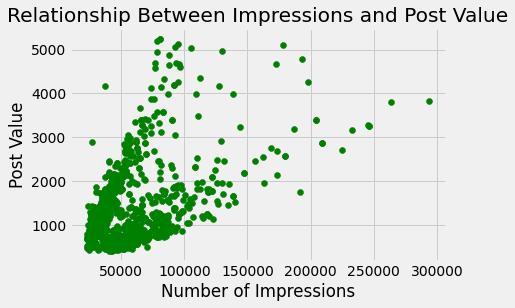

In [100]:
plt.scatter(x='Impressions', y='PostValue', data=no_outliers_fb_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Impressions and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Impressions')

In [ ]:
plt.scatter(x='Engagement', y='PostValue', data=no_outliers_fb_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Engagement and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Engagements')

## Instagram

In [101]:
instagram['Impressions'].corr(instagram['PostValue'])

0.740490041098746

In [102]:
instagram['Engagement'].corr(instagram['PostValue'])

0.7268214616094775

In [103]:
no_outliers_insta_only = instagram[instagram['Impressions'].between(instagram['Impressions'].quantile(0.025),instagram['Impressions'].quantile(0.975))]
no_outliers_insta_only = no_outliers_insta_only[no_outliers_insta_only['PostValue'].between(no_outliers_insta_only['PostValue'].quantile(0.025),no_outliers_insta_only['PostValue'].quantile(0.975))]

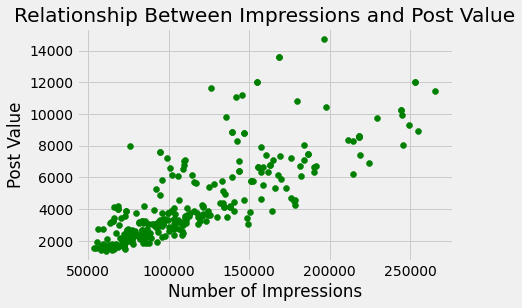

In [104]:
plt.scatter(x='Impressions', y='PostValue', data=no_outliers_insta_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Impressions and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Impressions')

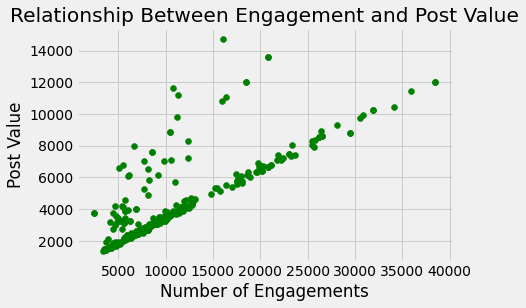

In [105]:
plt.scatter(x='Engagement', y='PostValue', data=no_outliers_insta_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Engagement and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Engagements')

## Twitter

In [106]:
twitter['Impressions'].corr(twitter['PostValue'])

0.6804326829654754

In [107]:
twitter['Engagement'].corr(twitter['PostValue'])

0.6602097741018473

In [108]:
no_outliers_tw_only = twitter[twitter['Impressions'].between(twitter['Impressions'].quantile(0.025),twitter['Impressions'].quantile(0.975))]
no_outliers_tw_only = no_outliers_tw_only[no_outliers_tw_only['PostValue'].between(no_outliers_tw_only['PostValue'].quantile(0.025),no_outliers_tw_only['PostValue'].quantile(0.975))]

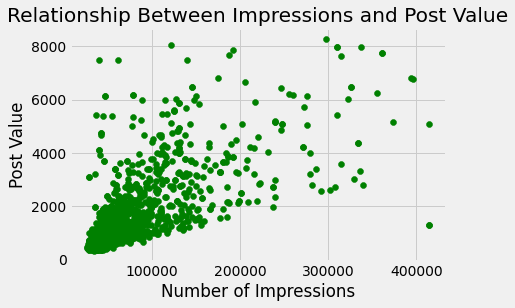

In [109]:
plt.scatter(x='Impressions', y='PostValue', data=no_outliers_tw_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Impressions and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Impressions')

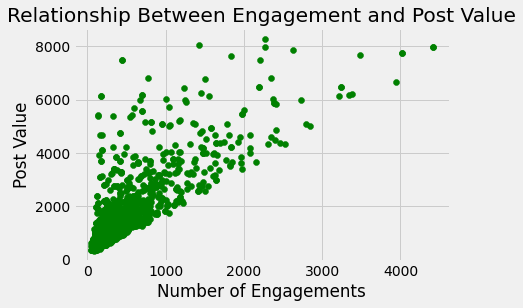

In [110]:
plt.scatter(x='Engagement', y='PostValue', data=no_outliers_tw_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Engagement and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Engagements')

## YouTube

In [111]:
youtube['Impressions'].corr(youtube['PostValue'])

0.999999992889682

In [112]:
youtube['Engagement'].corr(youtube['PostValue'])

0.921394747872826

In [113]:
no_outliers_yt_only = youtube[youtube['Impressions'].between(youtube['Impressions'].quantile(0.025),youtube['Impressions'].quantile(0.975))]
no_outliers_yt_only = no_outliers_yt_only[no_outliers_yt_only['PostValue'].between(no_outliers_yt_only['PostValue'].quantile(0.025),no_outliers_yt_only['PostValue'].quantile(0.975))]

Text(0.5, 0, 'Number of Impressions')

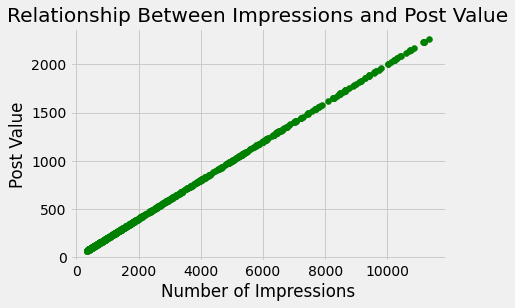

In [114]:
plt.scatter(x='Impressions', y='PostValue', data=no_outliers_yt_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Impressions and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Impressions')

Text(0.5, 0, 'Number of Engagements')

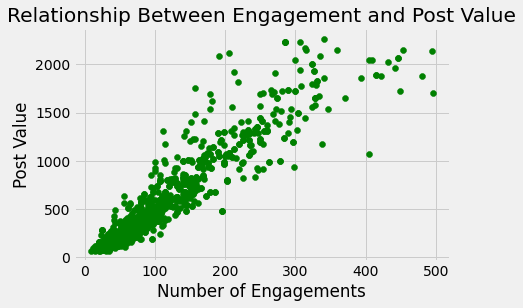

In [115]:
plt.scatter(x='Engagement', y='PostValue', data=no_outliers_yt_only, c='Green')
plt.style.use('fivethirtyeight')
plt.title('Relationship Between Engagement and Post Value')
plt.ylabel('Post Value')
plt.xlabel('Number of Engagements')